# Multi Salmo microbetag networks analysis

## Building `microbetag`-annotated networks

Original files

- abundance data file: `salm_multi_filtered_30.tsv` (date: 27/05/2025 - email correspondence)
- taxonomy file: `salm_multio_abd_table_gc.tsv` (since the filtered_30 abundance data file has no classification column, we will use a previous version of the file to make sure we map the MAG ID to the correct taxonomy)
- metadata file: `sample_metadata_corrected.csv` (date: 20/6/25 - discord message ; yet metabolites not included)
- metabolites data: `original_mets_data_20250113.xlsx` (cannot track how I got this)

In the following chunk we bring the samples of the two files (columns) in the same order -- necessary for FlashWeave to build networks using metadata. 

In [9]:
abundance_file   = "salm_multi_filtered_30.tsv"
taxonomy_file    = "salm_multio_abd_table_gc.tsv"
metadata_file    = "sample_metadata_corrected.csv"
metabolites_file = "original_mets_data_20250113.xlsx"
template_config  = "config_v104.yml"

Load libraries and set root paths.

In [10]:
import os
import sys
import pandas as pd 
from pathlib import Path

root            = Path(os.getcwd())
input_data      = root / "data"
microbetag_data = root / "microbetag_input/"

Load abundance data

In [11]:
abd      = pd.read_csv(input_data / abundance_file, sep="\t", index_col=0)
abd.head(2)

D300530  D300531  D300470  D300477  D300433  D300479  \
genome                                                                     
D300418:bin_000001        0        0      0.0      0.0      0.0      0.0   
D300418:bin_000013        0        0      0.0      0.0      0.0      0.0   

                    D300436  D300445  D300521  D300514  ...  D300524  D300469  \
genome                                                  ...                     
D300418:bin_000001      0.0      0.0      0.0      0.0  ...      0.0      0.0   
D300418:bin_000013      0.0      0.0      0.0      0.0  ...      0.0      0.0   

                    D300520  D300505  D300493  D300499  D300503  D300464  \
genome                                                                     
D300418:bin_000001      0.0      0.0      0.0      0.0      0.0      0.0   
D300418:bin_000013      0.0      0.0      0.0      0.0      0.0      0.0   

                    D300515  D300497  
genome                                
D300418:bin_000001      0.0      0.0  
D300418:bin_000013      0.0      0.0  

[2 rows x 114 columns]

In [12]:
tax = pd.read_csv(input_data / taxonomy_file, sep = "\t")
tax = tax[["genome", "classification"]]
tax.head()

genome                                     classification
0  D300418:bin_000001  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...
1  D300418:bin_000013  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...
2  D300428:bin_000008  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Ch...
3  D300430:bin_000010  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...
4  D300432:bin_000001  d__Bacteria;p__Bacillota_A;c__Clostridia;o__La...

In [13]:
abd = abd.merge(tax, on='genome', how='left')
abd.head(2)

genome  D300530  D300531  D300470  D300477  D300433  D300479  \
0  D300418:bin_000001        0        0      0.0      0.0      0.0      0.0   
1  D300418:bin_000013        0        0      0.0      0.0      0.0      0.0   

   D300436  D300445  D300521  ...  D300469  D300520  D300505  D300493  \
0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

   D300499  D300503  D300464  D300515  D300497  \
0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0   

                                      classification  
0  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...  
1  d__Bacteria;p__Bacillota_A;c__Clostridia;o__Os...  

[2 rows x 116 columns]

Load metadata file, mapping samples to their corresponding treatment and day.
In the following table we provide a short description of the treatments. 

|  Factor        |	TG1 | TG2 |	TG3 | TG4 | TG5 |
|:--------------:|:----:|:---:|:---:|:---:|:---:|
|salmonella	     | Yes	| Yes | Yes | Yes | No  |
|synbiotic_water | Yes	| Yes |	No  | No  |	No  |
|synbiotic_feed	 | Yes	| No  |	Yes | No  | No  |



In [14]:
metadata = pd.read_csv(input_data / metadata_file)
metadata.head(2)

sample   batch animal   tissue treatment  day
0  D300530  S3B009   G000  Digesta       TG0  NaN
1  D300531  S3B009   G000  Digesta       TG0  NaN

In the metabolites file, you may see that a great number of metabolites were measured in the study, however we selected the most relevant that could affect the samples' communities, and we kept their values in the 'of-interest' sheet.

In [15]:
mets = pd.read_excel(input_data / metabolites_file, sheet_name="of-interest")

# For some reason there is an extra "M" in the end of the sample name 
mets.columns = [mets.columns[0]] + [col[:-1] for col in mets.columns[1:]]
mets.head(2)

metabolite          G124          G030          G066          G044  \
0       L-Tyrosine  1.154862e+06  1.070405e+06  7.233821e+05  1.439299e+06   
1  L-Phenylalanine  1.233174e+06  1.647481e+06  1.049884e+06  2.071581e+06   

            G020          G113          G031          G050          G118  ...  \
0  632785.722057  1.157299e+06  6.014387e+05  1.961503e+06  1.125862e+06  ...   
1  681458.305129  2.325329e+06  1.862486e+06  2.386789e+06  1.744189e+06  ...   

           G007           G029           G032          G111           G017  \
0  6.721533e+05  462266.471921  471502.748026  1.546473e+06  328951.773787   
1  2.686876e+06  727284.939809  955339.135261  2.574471e+06  525748.264667   

            G048          G026          G027          G104          G094  
0  656204.241988  2.938963e+06  4.103840e+06  1.906260e+06  1.910604e+06  
1  753097.476399  2.199197e+07  2.619296e+07  1.816819e+06  2.377164e+06  

[2 rows x 112 columns]

We will now merge the metabolites' data with the rest of the metadata of each sample, so we use their combination to infer microbial co-occurrence networks with FlashWeave. 
To this end, we will use the `animal` column of the metadata, that has been used as the sample name for the metabolites' measurements. 

In [16]:
# Ensure 'metabolite' is set as index so rows are labeled by metabolite name
mets_indexed = mets.set_index('metabolite')

# Loop over each metabolite (each row in mets) and map values to metadata
for metabolite in mets_indexed.index:
    metadata[metabolite] = metadata['animal'].map(mets_indexed.loc[metabolite].to_dict())

print(metadata.shape)
metadata.head(2)


(114, 29)


sample   batch animal   tissue treatment  day  L-Tyrosine  \
0  D300530  S3B009   G000  Digesta       TG0  NaN         NaN   
1  D300531  S3B009   G000  Digesta       TG0  NaN         NaN   

   L-Phenylalanine  L-Tryptophan  L-Aspartic Acid  ...  Thiamine  Adenine  \
0              NaN           NaN              NaN  ...       NaN      NaN   
1              NaN           NaN              NaN  ...       NaN      NaN   

   Guanosine  L-Valine  L-Alanine  L-Asparagine  L-Isoleucine  L-Serine  \
0        NaN       NaN        NaN           NaN           NaN       NaN   
1        NaN       NaN        NaN           NaN           NaN       NaN   

   Lactic acid  Sulfoacetic acid  
0          NaN               NaN  
1          NaN               NaN  

[2 rows x 29 columns]

In [17]:
metadata[metadata["animal"] == "G003"]

sample   batch animal   tissue treatment   day  L-Tyrosine  \
93  D300477  S3B009   G003  Digesta       TG5  14.0         NaN   

    L-Phenylalanine  L-Tryptophan  L-Aspartic Acid  ...  Thiamine  Adenine  \
93              NaN           NaN              NaN  ...       NaN      NaN   

    Guanosine  L-Valine  L-Alanine  L-Asparagine  L-Isoleucine  L-Serine  \
93        NaN       NaN        NaN           NaN           NaN       NaN   

    Lactic acid  Sulfoacetic acid  
93          NaN               NaN  

[1 rows x 29 columns]

And to bring it a `microbetag`-friendly format, we will transpose the table.

In [18]:
metadata = metadata.T
metadata.columns = metadata.iloc[0]
metadata = metadata.drop(metadata.index[0])

# Make day an integer -- not a float
metadata.loc["day"] = metadata.loc["day"].astype('Int64')

metadata.head(2)

sample D300530 D300531 D300529 D300480 D300517 D300428 D300509 D300516  \
batch   S3B009  S3B009  S3B009  S3B009  S3B009  S3B009  S3B009  S3B009   
animal    G000    G000    G085    G086    G087    G088    G089    G090   

sample D300510 D300483  ... D300524 D300469 D300520 D300505 D300493 D300499  \
batch   S3B009  S3B009  ...  S3B009  S3B009  S3B009  S3B009  S3B009  S3B009   
animal    G091    G092  ...    G115    G116    G118    G119    G120    G121   

sample D300503 D300464 D300515 D300497  
batch   S3B009  S3B009  S3B009  S3B009  
animal    G122    G123    G124    G125  

[2 rows x 114 columns]

You may notice that `metadata` now, have 114 columns, thus 114 samples, as many as the abundance table, but the original `metabolites` dataframe had only 112; this is because no measurements were taken for the two blank samples.
Those two samples (`D300530` and `D300531`) have `NaN` values across all their metabolites. 

We can now check that our abundance and metadata dataframes have the same elements across their columns.

In [137]:
set(abd.columns) == set(metadata.columns)

True

However, even the columns are the same, their order is **different**! 

In [138]:
set(abd.columns) == set(metadata.columns) and list(abd.columns) != list(metadata.columns)

True

It is essential we have the same order on the two dataframes for FlashWeave. 

In [22]:
abd_reordered = abd[metadata.columns]

Yet, FlashWeave cannot handle with null values, meaning we need to remove such cases from both abundance and metadata dataframes. 

In [19]:
def remove_cols_with_null(df):

    # Store original columns
    original_columns = df.columns

    # Drop columns with all NaNs
    df_clean = df.dropna(axis=1, how='any')

    # Find which columns were dropped
    dropped_columns = original_columns.difference(df_clean.columns)
    
    return df_clean, dropped_columns

In [20]:
metadata_cl, dropped_samples = remove_cols_with_null(metadata)
dropped_samples

Index(['D300477', 'D300530', 'D300531'], dtype='object', name='sample')

In [21]:
abd_cl, dropped_samples_abd = remove_cols_with_null(abd)
dropped_samples_abd

Index([], dtype='object')

We observe that only in the case of the metadata dataframe we had some null values, in three samples that correspond to the two blank ones ('D300530', 'D300531') and a TG5/day14 one (animal G003).

Yet, we need to remove those three samples from the `abd` dataframe too. 

In [22]:
abd = abd.drop(columns=dropped_samples)

So, we can now export the two basic files to be used for the `microbetag` analysis in its required format.

In [77]:
abd_reordered.to_csv(microbetag_data / "abundance.tsv", sep="\t")
metadata_cl.to_csv(microbetag_data / "metadata.tsv", sep="\t")  # header=False

Since we are interested in how communities change per treatment and per day, besides the overall network, we will also build `microbetag`-annotated networks per-day and per-treatment. 

To do so, we need to split the above dataframes accordingly, for each such _type_.

In [45]:
types = ["day", "treatment"]

In [51]:
for type in types:

    # Get the treatment row as a Series
    cases = metadata_cl.loc[type, :]

    for case in cases.unique():
        
        if type == "treatment":
            for i, c in enumerate(case):
                if c.isdigit():
                    ltype, lcase = case[:i], str(case[i:])
                    break
        else:
            lcase = str(case)
            ltype = type

        # Get column names (samples) matching the current treatment
        selected_samples = cases[cases == case].index

        # Subset the metadata to only those samples (i.e., columns)
        tr_metadata = metadata_cl[selected_samples]
        
        # Get same samples from the abundance table
        tr_abd = abd[ ["genome"] + tr_metadata.columns.tolist() + ["classification"]]

        # Export those subset of the dataframes to files
        abd_outfile  = "_".join(["abd", ltype, lcase])
        abd_outfile += ".tsv"
        meta_outfile = "_".join(["metadata", ltype, lcase])
        meta_outfile += ".tsv"

        tr_abd.to_csv(microbetag_data / "_".join(["per", type]) / abd_outfile, index=False)
        tr_metadata.to_csv(microbetag_data / "_".join(["per", type]) / meta_outfile, index_label="sample")

Cool! 

Now, we are ready to fire `microbetag` !

We will use _microbetag_  `v1.0.4`. To run `microbetag` we need to fill-in a configuration file, which we need to make sure it is the one that corresponds to the _microbetag_ version we'using.

In [55]:
import yaml 

for type in types:

    input_dir = microbetag_data / "_".join(["per", type])

    # Find all abd_day_*.tsv files
    abd_files = sorted(input_dir.glob("abd_*.tsv"))

    for abd_file in abd_files:

        # Extract the day number (e.g., 14 from abd_day_14.tsv); .stem is an attribute of a Path object that returns the filename without its suffix (extension).
        case = abd_file.stem.split('_')[-1]

        if type == "treatment":
            ltype = "TG"
            lcase = case.split("TG")[-1]
        else:
            ltype = type
            lcase = str(case)

        # Construct the corresponding metadata filename
        metadata_file = input_dir / f"metadata_{ltype}_{lcase}.tsv"

        if metadata_file.exists():

            # Open and read the YAML file
            with open(microbetag_data / template_config, 'r') as f:
                config = yaml.safe_load(f)

            config["abundance_table_file"]["file_path"] = str(abd_file)
            config["metadata_file"]["file_path"]        = str(metadata_file)
            
            # In case of day 7 we need to edit FlashWeave's arguments because of low number of samples
            if ltype == "day" and lcase == 7: 
                config["max_k"]["value"] = 2

        else:
            print(f"Warning: Metadata file for {ltype} {lcase} not found!")

        # Export to YAML file
        conf_file = "_".join(["config", ltype, lcase])
        conf_file += '.yaml'
        with open(conf_file, 'w') as f:
            yaml.dump(config, f, sort_keys=False)

In [ ]:
# Build tarball
tar -czf reconstructions/GENREs.tar.gz reconstructions/GENREs/
tar -czf pathway_complementarity.tar.gz pathway_complementarity/

#Decompress tarball 
tar -zxvf reconstructions/GENREs.tar.gz
tar -zxvf pathway_complementarity.tar.gz


We now call `microbetag` for each configure file built. 
We have built a bash script for this (`run_mtg.sh`) to avoid notebook-related issues.

> Attention !
>
> GitHub has a max size for a single file at 100MB. Thus the precalculations in some cases are stored as tarballs.
> In case you run this notebook for the first time, make sure you decompress those under the `mgg_prec` output folder.

If the following s

In [7]:
!bash run_mtg.sh


CondaError: Run 'conda init' before 'conda deactivate'


CondaError: Run 'conda init' before 'conda activate'

A microbetag annotated network is already built for day 14.
Building microbetag-annotated network for day 21
Run microbetag
rm: cannot remove 'mgg_prec/network_output.edgelist': No such file or directory
mv: cannot stat 'mgg_prec/mtag_net_*': No such file or directory

----  microbetag for day 21 is complete. ---  

A microbetag annotated network is already built for day 28.
Building microbetag-annotated network for day 35
Run microbetag
^C


## Functions

Load dependencies

In [1]:
# General
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import plotly.io as pio
import plotly.express as px
import webbrowser

# Utils
from utils import *

In [2]:
# Load the datasets
genome_taxonomy = pd.read_csv("../data/gtdbtk.summary.tsv", sep="\t")
genome_quality = pd.read_csv("../data/genomeInfo.csv")

selected_genomes = pd.read_csv("../data/Wdb.csv")
selected_genomes["genome"] = selected_genomes["genome"].str.replace(".fa", "", regex=True)
selected_genomes = selected_genomes["genome"]

# Modify genome names
genome_taxonomy['genome'] = genome_taxonomy['user_genome'].str.replace('.fa', '', regex=True)

genome_taxonomy = genome_taxonomy[genome_taxonomy['genome'].isin(selected_genomes)]

# Split the classification into separate columns
genome_taxonomy[['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']] = genome_taxonomy['classification'].str.split(';', expand=True)

# Select the relevant columns
genome_taxonomy = genome_taxonomy[['genome', 'domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']]

# Process genome quality data
genome_quality['genome'] = genome_quality['genome'].str.replace('.fa', '', regex=True)

# Filter only selected genomes (the 223 species-representatives)
genome_quality = genome_quality[genome_quality['genome'].isin(selected_genomes)]

# Select relevant columns
genome_quality = genome_quality[['genome', 'completeness', 'contamination', 'length']]

# Merge the two dataframes on the 'genome' column
genome_metadata = pd.merge(genome_taxonomy, genome_quality, on='genome', how='left')

In [3]:
genome_taxonomy.head()
genome_quality.head()
genome_metadata.head()

genome       domain          phylum          class  \
0  D300418:bin_000001  d__Bacteria  p__Bacillota_A  c__Clostridia   
1  D300418:bin_000013  d__Bacteria  p__Bacillota_A  c__Clostridia   
2  D300428:bin_000008  d__Bacteria  p__Bacillota_A  c__Clostridia   
3  D300430:bin_000010  d__Bacteria  p__Bacillota_A  c__Clostridia   
4  D300432:bin_000001  d__Bacteria  p__Bacillota_A  c__Clostridia   

                   order                 family              genus  \
0     o__Oscillospirales     f__Ruminococcaceae     g__Faeciplasma   
1     o__Oscillospirales  f__Acutalibacteraceae     g__Fimivicinus   
2  o__Christensenellales      f__Borkfalkiaceae     g__Coproplasma   
3     o__Oscillospirales    f__Oscillospiraceae  g__Intestinimonas   
4      o__Lachnospirales     f__Anaerotignaceae        g__Fimicola   

                               species  completeness  contamination   length  
0            s__Faeciplasma gallinarum         99.49           0.17  1791036  
1         s__Fimivicinus intestinavium         81.41           1.94  2332804  
2  s__Coproplasma excrementigallinarum         82.32           3.54  1922776  
3         s__Intestinimonas timonensis         83.60           7.68  3001106  
4              s__Fimicola sp944379995         95.93           0.97  2795297

Functions for the needs of the stats.

## Discussing the nets

***Salmonella*** is *positively* associated with **lactic acid**; in agreement with in vitro data. 

It’s also *negatively* associated with ***Lactobacillus johnsonii***, with a stronger negative than positive seed score. That means that *Lactobacillus johnsonii* is another probiotic candidate species.

*Salmonella* is also *negatively* associated with **time**, which is not unexpected.

***Ligilactobacillus salivarius*** (PoultryStar member) is *positively* associated to **synbiont-water**, in addition to **TG4** (no PoultryStar), so it does show up in some chickens supposed to have received it. 
Maybe that means that it is present in some hosts prior to treatment. 

**TG1** is linked to *Tyzzerella sp.* both in the global network and day 7 network.

Early days are more strongly shaped by treatment groups than later days.

Also, there are more taxon-metabolite associations in later days, with a peak in day 21.

There is a jump in node and edge number from 7 to 21 days, though the overall (Pearson) correlation of day to edge or node number is not significant.
Thus, the network gets more complex with changing feeding habits.


It seems that from day 28 to 35, even the number of edges is decreasing, the potential cross feedings are increased.

## Stats

### Prep

Keep track of the non-sequence nodes.

In [4]:
env_var = ["treatment_TG1", "treatment_TG2", "treatment_TG3", "treatment_TG4", "treatment_TG5", 
           "day", "salmonella", "synbiotic_water", "synbiotic_feed"
]
metabolites = [
"L-Tyrosine", "L-Phenylalanine", "L-Tryptophan", "L-Aspartic Acid", "L-Arginine", "L-Leucine", "L-Glutamic acid", "L-Glutamine", 
"L-Histidine", "L-Lysine", "L-Methionine", "L-Proline", "L-Threonine", "Thiamine", "Adenine", 'Guanosine', "L-Valine" , "L-Alanine", 
"L-Asparagine", "L-Isoleucine", "L-Serine", "Lactic acid", "Sulfoacetic acid"
]
env_set = set(env_var)
metabolites_set = set(metabolites)

In [5]:
root_dir = os.getcwd()
cx_dir = os.path.join(root_dir, "microbetag_nets")

In [6]:
cx_overall_filepath = os.path.join(cx_dir, "overall.cx2")
cx_overall = load_cx2(cx_overall_filepath)
overall_mtg = MggParser(cx_overall, env_set, metabolites_set),

### Per day networks

#### Prep

Calculate statistics on the microbetag-annotated networks per day.

Load the `.cx2` files 

In [7]:
cx_07_filepath = os.path.join(cx_dir, "microbetag_net_day_7.cx2")  ; cx_07 = load_cx2(cx_07_filepath)
cx_14_filepath = os.path.join(cx_dir, "microbetag_net_day_14.cx2") ; cx_14 = load_cx2(cx_14_filepath)
cx_21_filepath = os.path.join(cx_dir, "microbetag_net_day_21.cx2") ; cx_21 = load_cx2(cx_21_filepath)
cx_28_filepath = os.path.join(cx_dir, "microbetag_net_day_28.cx2") ; cx_28 = load_cx2(cx_28_filepath)
cx_35_filepath = os.path.join(cx_dir, "microbetag_net_day_35.cx2") ; cx_35 = load_cx2(cx_35_filepath)

Example of how an edge looks like on the `.cx2` format.
```json

// Edge example
    {'id': 245,
    's': 83,
    't': 2,
    'v': {'interaction type': 'cooccurrence',
    'microbetag::weight': 0.9523214101791382,
    'shared name': 'L-Leucine (cooccurss with) L-Isoleucine'}}

```

In [8]:
days = [7, 14, 21, 28, 35]

#### Count the number of **taxon-metabolite associations** in the day-specific networks and correlate it with day

In [9]:
days_parsed_nets = {
    "day07" : MggParser(cx_07, env_set, metabolites_set),
    "day14" : MggParser(cx_14, env_set, metabolites_set),
    "day21" : MggParser(cx_21, env_set, metabolites_set),
    "day28" : MggParser(cx_28, env_set, metabolites_set),
    "day35" : MggParser(cx_35, env_set, metabolites_set)
}

In [10]:
taxon_to_metabo_hits = [
    net.edge_types["taxon_to_metabo"]["counts"] for _, net in days_parsed_nets.items()
]
taxon_to_metabo_hits

[8, 5, 26, 12, 9]

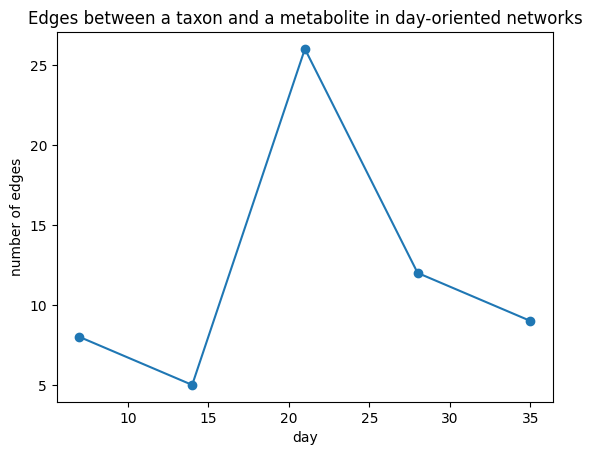

In [11]:
# What to plot
plt.plot(days, taxon_to_metabo_hits, marker='o', linestyle='-')
# Labels and title
plt.xlabel("day")
plt.ylabel("number of edges")
plt.title("Edges between a taxon and a metabolite in day-oriented networks")
# Show time
plt.show()


#### Count the number of taxon-treatment associations in the day-specific networks

In [12]:
taxon_to_env_hits = [
    net.edge_types["taxon_to_env"]["counts"] for _, net in days_parsed_nets.items()
]

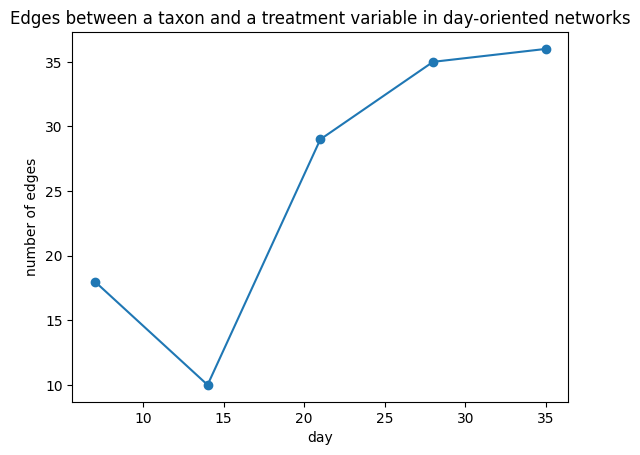

In [13]:
# What to plot
plt.plot(days, taxon_to_env_hits, marker='o', linestyle='-')
# Labels and title
plt.xlabel("day")
plt.ylabel("number of edges")
plt.title("Edges between a taxon and a treatment variable in day-oriented networks")
# Show time
plt.show()

#### Correlate time vs total number of cross-feedings across day-specific networks

In [14]:
overall_number_of_seed_compl = [
    sum(net.num_total_compls.values()) for _, net in days_parsed_nets.items()
]

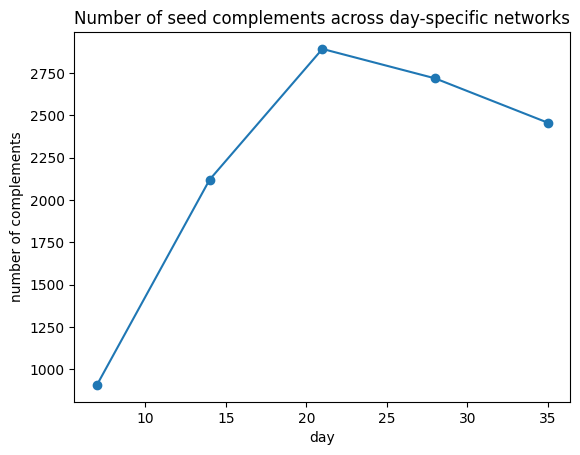

In [15]:
# What to plot
plt.plot(days, overall_number_of_seed_compl, marker='o', linestyle='-')
# Labels and title
plt.xlabel("day")
plt.ylabel("number of complements")
plt.title("Number of seed complements across day-specific networks")
# Show time
plt.show()

#### Correlation between number of positive taxon-to-taxon edged and predicted cross-feedings in day-specific networks 

In [16]:
number_of_seed_compl_per_day_in_positive_associated_taxa = [
    get_compls_and_compounds_in_positive_associated_taxa(
        net.cx2, 
        net.pos_pairs_node_ids, 
        net.num_total_compls, 
        net.edge_id_to_unique_compounds
        )[0] 
    for _, net in days_parsed_nets.items()
]

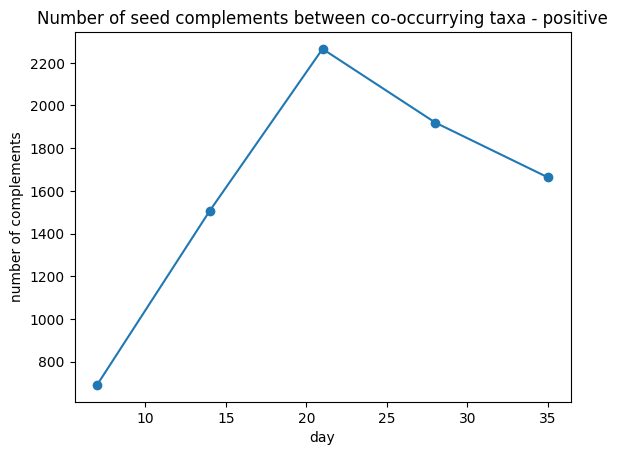

In [17]:
# What to plot
plt.plot(days, number_of_seed_compl_per_day_in_positive_associated_taxa, marker='o', linestyle='-')
# Labels and title
plt.xlabel("day")
plt.ylabel("number of complements")
plt.title("Number of seed complements between co-occurrying taxa - positive")
# Show time
plt.show()

In [18]:
mean_of_seed_compl_in_positive_associated_taxa = [
    number_of_seed_compl_per_day_in_positive_associated_taxa[index] / len(net.pos_pairs_node_ids) for index, net in enumerate(days_parsed_nets.values())
]
mean_overall_number_of_seed_compl = [
    overall_number_of_seed_compl[index] /  len(net.num_total_compls)  for index, net in enumerate(days_parsed_nets.values())
]

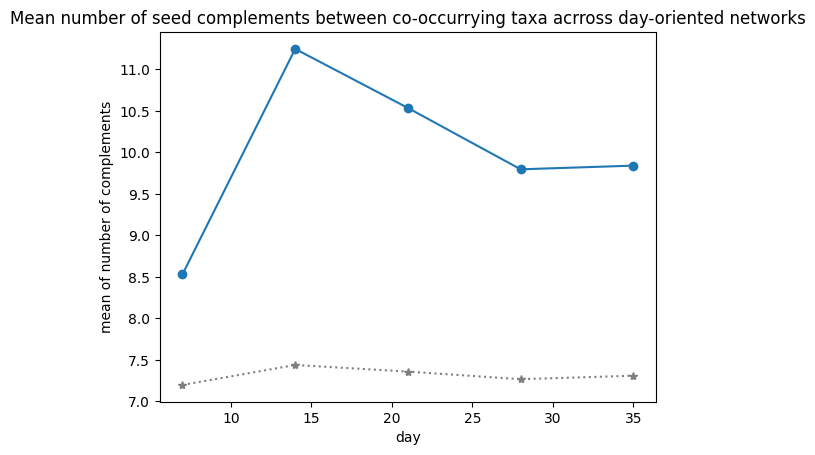

In [19]:
# What to plot
plt.plot(days, mean_of_seed_compl_in_positive_associated_taxa, marker='o', linestyle='-', label="between co-occurrying taxa")
plt.plot(days, mean_overall_number_of_seed_compl, marker="*", linestyle="dotted", color="grey", label="overall taxon-to-taxon")
# Labels and title
plt.xlabel("day")
plt.ylabel("mean of number of complements")
plt.title("Mean number of seed complements between co-occurrying taxa acrross day-oriented networks")
# Show time
plt.show()

#### Unique compounds involved in potential cross-feedings

In [20]:
unique_compounds_in_cf_of_positive_associated_taxa = [
    get_compls_and_compounds_in_positive_associated_taxa(
        net.cx2, 
        net.pos_pairs_node_ids, 
        net.num_total_compls, 
        net.edge_id_to_unique_compounds
        )[1]
    for _, net in days_parsed_nets.items()
]

In [21]:
lengths = [
    len(x) for x in unique_compounds_in_cf_of_positive_associated_taxa
]

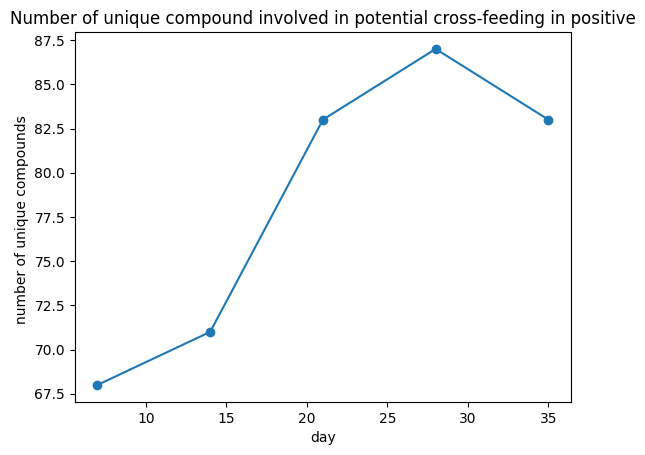

In [22]:
plt.plot(days, lengths, marker='o', linestyle='-')

# Labels and title
plt.xlabel("day")
plt.ylabel("number of unique compounds ")
plt.title("Number of unique compound involved in potential cross-feeding in positive")

# Show the plot
plt.show()

In [23]:
day_set = { "day_" + str(i): j for i,j in zip(days, unique_compounds_in_cf_of_positive_associated_taxa)}

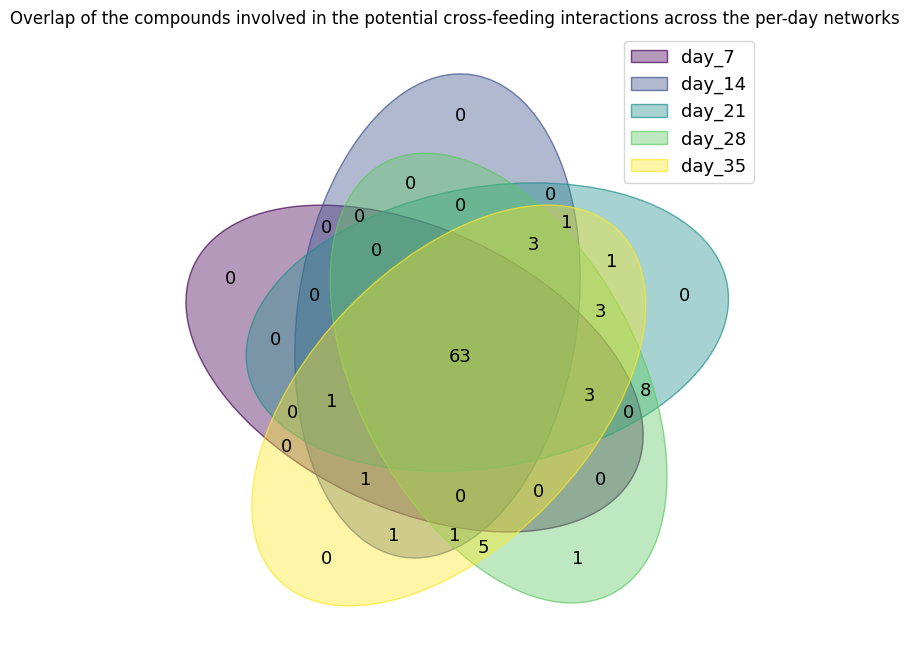

In [24]:
venn(day_set)
plt.title("Overlap of the compounds involved in the potential cross-feeding interactions across the per-day networks")

# Show the plot
plt.show()

In [25]:
day7 = days_parsed_nets["day07"]


```python
# node ids 15-112 both in cooccurence and complets/copmetes
day7.cx2.get_edges()
```

In [26]:
dfs = {}

ratio_ggplots = []

for _, day in enumerate(days_parsed_nets):                      # # NOTE (Haris Zafeiropoulos, 2025-04-02):  Enumerate will keep the same order as long as we do not edit the days_parased_nets dictionary

    day_net = days_parsed_nets[day]

    df = process_cooccurrence_and_regression(
        day_net, day, metabolites, env_set
    )

    dfs[day] = df


for day, df in dfs.items():

        ratio_ggplots.append( plot_neighbors_per_seed_compl(df, day,  model="WLS") )  # or OLS

In [27]:
dfs["day35"]

id  neighbors_num       neighbors  seed_compls_num                name  \
84    84              2        {196, 7}               31  D300526:bin_000014   
196  196              3  {84, 182, 102}               36  D300458:bin_000001   
39    39              2      {124, 167}               17  D300428:bin_000008   
167  167              3   {16, 163, 39}               28  D300435:bin_000001   
174  174              2        {162, 4}               11  D300499:bin_000015   
..   ...            ...             ...              ...                 ...   
78    78              1            {13}               21  D300443:bin_000002   
112  112              2      {113, 151}               58   TG5_28:bin_000004   
169  169              1             {4}               15   TG5_35:bin_000001   
113  113              2       {112, 21}               54   TG5_35:bin_000022   
181  181              1            {13}               13   TG5_35:bin_000024   

                                        species                  family  \
84                s__Blautia stercorigallinarum      f__Lachnospiraceae   
196           s__Coproplasma stercorigallinarum       f__Borkfalkiaceae   
39          s__Coproplasma excrementigallinarum       f__Borkfalkiaceae   
167               s__Anaerotignum merdipullorum      f__Anaerotignaceae   
174                 s__Caccovicinus sp017889125      f__Lachnospiraceae   
..                                          ...                     ...   
78                s__Clostridium_AQ sp900552125  f__Erysipelotrichaceae   
112                  s__Lactobacillus johnsonii     f__Lactobacillaceae   
169              s__Streptococcus alactolyticus     f__Streptococcaceae   
113  s__Pullichristensenella excrementipullorum               f__CAG-74   
181                  s__Scatomorpha sp900759385     f__Oscillospiraceae   

                     order condition  compl_ratio  
84       o__Lachnospirales     day35    15.500000  
196  o__Christensenellales     day35    12.000000  
39   o__Christensenellales     day35     8.500000  
167      o__Lachnospirales     day35     9.333333  
174      o__Lachnospirales     day35     5.500000  
..                     ...       ...          ...  
78   o__Erysipelotrichales     day35    21.000000  
112     o__Lactobacillales     day35    29.000000  
169     o__Lactobacillales     day35    15.000000  
113  o__Christensenellales     day35    27.000000  
181     o__Oscillospirales     day35    13.000000  

[145 rows x 10 columns]

In [28]:
for day, df in dfs.items():

    r2, p_v = weighted_pearson_with_pvalue(df, "neighbors_num", "compl_ratio", "compl_ratio")
    
    print(day, r2, p_v)
    
    
    spearman = spearman_corr(df, "neighbors_num", "compl_ratio")
    
    print(day, spearman)


day07 -0.2847052163799639 0.010478954730562151
day07 0.0058900390492623205
day14 -0.10679315173506829 0.2229281607435838
day14 0.017161569570662623
day21 -0.07838962020632162 0.3024689345369387
day21 -0.03782561101221808
day28 -0.13125375627698474 0.0908836088498699
day28 0.009276343460278483
day35 0.03349868263405966 0.6891575538077275
day35 0.12008658338105979


In the `ratio_ggplots`, we now have for each day net its corresponding plot:

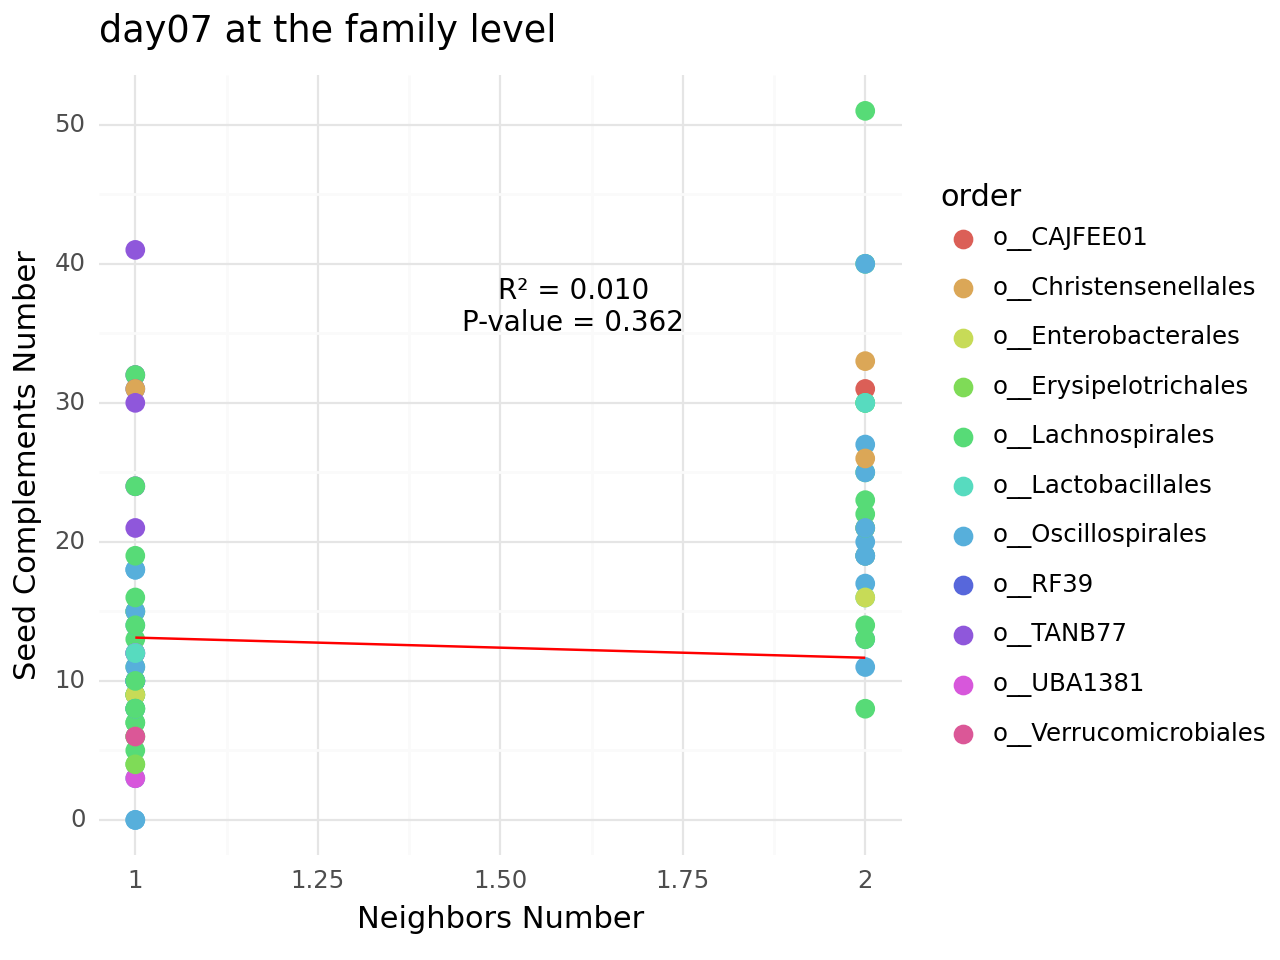

<Figure Size: (640 x 480)>

In [36]:
ratio_ggplots[0][0]

but also, its data frame.

In [37]:
ratio_ggplots[0][1]

id  neighbors_num neighbors  seed_compls_num                name  \
112  112              2   {1, 15}               22  D300511:bin_000016   
15    15              1     {112}               13  D300452:bin_000016   
25    25              2  {82, 30}               33  D300428:bin_000008   
82    82              2  {88, 25}               40  D300442:bin_000001   
47    47              2  {81, 67}               30  D300526:bin_000014   
..   ...            ...       ...              ...                 ...   
107  107              1      {20}                8   TG3_35:bin_000033   
67    67              2  {66, 47}               30   GEXTRA:bin_000006   
99    99              1      {89}                6      TG5:bin_000031   
89    89              1      {99}                6      GPB:bin_000056   
66    66              1      {67}               12   TG5_28:bin_000004   

                                 species               family  \
112             s__Merdisoma sp002160825   f__Lachnospiraceae   
15         s__Eisenbergiella sp904392525   f__Lachnospiraceae   
25   s__Coproplasma excrementigallinarum    f__Borkfalkiaceae   
82             s__Tyzzerella sp944383305           f__CAG-274   
47         s__Blautia stercorigallinarum   f__Lachnospiraceae   
..                                   ...                  ...   
107            s__Hungatella_B pullicola   f__Lachnospiraceae   
67           s__Pediococcus acidilactici  f__Lactobacillaceae   
99     s__Anaerotignum lactatifermentans   f__Anaerotignaceae   
89            s__Akkermansia sp905200945   f__Akkermansiaceae   
66            s__Lactobacillus johnsonii  f__Lactobacillaceae   

                     order condition  compl_ratio  
112      o__Lachnospirales     day07         11.0  
15       o__Lachnospirales     day07         13.0  
25   o__Christensenellales     day07         16.5  
82       o__Lachnospirales     day07         20.0  
47       o__Lachnospirales     day07         15.0  
..                     ...       ...          ...  
107      o__Lachnospirales     day07          8.0  
67      o__Lactobacillales     day07         15.0  
99       o__Lachnospirales     day07          6.0  
89   o__Verrucomicrobiales     day07          6.0  
66      o__Lactobacillales     day07         12.0  

[82 rows x 10 columns]

To save all the per day plots with the seed complementarities number against the number of positive neighbors:

In [ ]:
for index, plot in enumerate(ratio_ggplots):
    
    ggsave(plot[0], filename=f"figs/seed_stats/compls_per_neighbor_wls_{days[index]}.svg", width=8, height=8, format="svg", dpi=300)

In [41]:
df = process_cooccurrence_and_regression(
        overall_mtg[0], "overall", metabolites, env_set
    )
df

id  neighbors_num                    neighbors  seed_compls_num  \
162  162              5         {10, 16, 21, 56, 92}               49   
16    16              3                {162, 4, 213}               21   
227  227              3                 {120, 2, 20}               67   
2      2              6  {227, 166, 73, 43, 206, 24}               85   
50    50              3              {144, 147, 220}               43   
..   ...            ...                          ...              ...   
163  163              1                        {157}               24   
32    32              2                    {152, 87}               20   
15    15              2                    {88, 139}               44   
88    88              1                         {15}               22   
69    69              4           {81, 209, 69, 207}               43   

                   name                                     species  \
162  D300452:bin_000016               s__Eisenbergiella sp904392525   
16   D300435:bin_000001               s__Anaerotignum merdipullorum   
227  D300418:bin_000013                s__Fimivicinus intestinavium   
2    D300418:bin_000001                   s__Faeciplasma gallinarum   
50   D300474:bin_000012          s__Mediterraneibacter norwichensis   
..                  ...                                         ...   
163   TG5_28:bin_000004                  s__Lactobacillus johnsonii   
32    TG5_35:bin_000001              s__Streptococcus alactolyticus   
15    TG5_35:bin_000022  s__Pullichristensenella excrementipullorum   
88       GPB:bin_000060                s__Acutalibacter sp900755895   
69    TG5_35:bin_000024                  s__Scatomorpha sp900759385   

                    family                  order condition  compl_ratio  
162     f__Lachnospiraceae      o__Lachnospirales   overall     9.800000  
16      f__Anaerotignaceae      o__Lachnospirales   overall     7.000000  
227  f__Acutalibacteraceae     o__Oscillospirales   overall    22.333333  
2       f__Ruminococcaceae     o__Oscillospirales   overall    14.166667  
50      f__Lachnospiraceae      o__Lachnospirales   overall    14.333333  
..                     ...                    ...       ...          ...  
163    f__Lactobacillaceae     o__Lactobacillales   overall    24.000000  
32     f__Streptococcaceae     o__Lactobacillales   overall    10.000000  
15               f__CAG-74  o__Christensenellales   overall    22.000000  
88   f__Acutalibacteraceae     o__Oscillospirales   overall    22.000000  
69     f__Oscillospiraceae     o__Oscillospirales   overall    10.750000  

[216 rows x 10 columns]

In [43]:
overall = plot_neighbors_per_seed_compl(df, "overall")

In [ ]:
ggsave(overall[0], filename="figs/seed_stats/compls_per_neighbor_wls_overall.svg", width=8, height=8, format="svg", dpi=300)

/home/luna.kuleuven.be/u0156635/.local/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 8 in image.
/home/luna.kuleuven.be/u0156635/.local/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figs/seed_stats/compls_per_neighbor_wls_overall.svg


Use the genome metadata `df` we built in the beginning of the notebook, to get the genome size of each MAG.

In [47]:
for df in dfs.values():
    df["genome size"] = df["name"].map(genome_metadata.set_index("genome")["length"])
    df.rename(columns={"neighbors_num": "number of neighbors", "compl_ratio": "seed complements per neighbor"}, inplace=True)
df.head()

id  number of neighbors       neighbors  seed_compls_num  \
84    84                    2        {196, 7}               31   
196  196                    3  {84, 182, 102}               36   
39    39                    2      {124, 167}               17   
167  167                    3   {16, 163, 39}               28   
174  174                    2        {162, 4}               11   

                   name                              species  \
84   D300526:bin_000014        s__Blautia stercorigallinarum   
196  D300458:bin_000001    s__Coproplasma stercorigallinarum   
39   D300428:bin_000008  s__Coproplasma excrementigallinarum   
167  D300435:bin_000001        s__Anaerotignum merdipullorum   
174  D300499:bin_000015          s__Caccovicinus sp017889125   

                 family                  order condition  \
84   f__Lachnospiraceae      o__Lachnospirales     day35   
196   f__Borkfalkiaceae  o__Christensenellales     day35   
39    f__Borkfalkiaceae  o__Christensenellales     day35   
167  f__Anaerotignaceae      o__Lachnospirales     day35   
174  f__Lachnospiraceae      o__Lachnospirales     day35   

     seed complements per neighbor  genome size  
84                       15.500000      3288674  
196                      12.000000      1947586  
39                        8.500000      1922776  
167                       9.333333      2545646  
174                       5.500000      4069219

In [49]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df, 
    x='number of neighbors', 
    y='seed complements per neighbor', 
    z='genome size', 
    color='order',  
    symbol='order',  
    size_max=10,
    opacity=0.8
)

In [50]:
# Save the plot as an HTML file
html_file = "plotly_3d_plot2.html"
fig.write_html(html_file)

# Open the HTML file in the default web browser
webbrowser.open(html_file)

True

After I open the `.html` file on my browser, I turned it around a bit and I extracted its ***camera settings*** by moving to the *Inspect* and running the following command on the `Console`:


    JSON.stringify(document.querySelector("div.js-plotly-plot")._fullLayout.scene.camera)


In [ ]:
camera_settings = {
    "up":{"x":0,"y":0,"z":1},
    "center":{"x":0,"y":0,"z":0},
    "eye":{"x":-1.0142173958395229,"y":1.6792529527047904,"z":0.9159544720174357},
    "projection":{"type":"perspective"}
}


In [ ]:
fig.update_layout(
    scene_camera=camera_settings,
    width=1200,  # Width of the figure in pixels
    height=1000,  # Height of the figure in pixels
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the plot area
    paper_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the surrounding area
    font=dict(size=14),  # Increase font size for axes and other text elements
    title_font = {"size": 40},
    yaxis_title_font=dict(size=20)   # Increase font size for y-axis label
)

fig.update_xaxes(title='New x label')


# Save the figure as an SVG file
pio.write_image(fig, "plot.svg")

In [51]:
# cx_07
# days_parsed_nets["day07"].edge_types.keys()

taxa_pair_2_edge_id = {}
for edge_id in cx_07.get_edges():
    edge = cx_07.get_edge(edge_id)    
    pair = (edge["s"], edge["t"])
    if edge["v"]["interaction type"] != "completes/competes with":    
        taxa_pair_2_edge_id[pair] = edge_id


pos_weight_scores, neg_weight_scores = {}, {}
for edge_id in days_parsed_nets["day07"].edge_types["taxon_to_taxon"]["edges"]:
    edge = cx_07.get_edge(edge_id)
    if edge["v"]["interaction type"] in ["cooccurrence", "depletion"]:
        continue

    comp, coop, s, t = edge["v"]["seed::competition"], edge["v"]["seed::cooperation"], edge["s"], edge["t"]
    eid = taxa_pair_2_edge_id.get((s, t), taxa_pair_2_edge_id.get((t, s)))

    flashweave_score = cx_07.get_edge(eid)["v"]["microbetag::weight"]
    target = pos_weight_scores if flashweave_score > 0 else neg_weight_scores
    target[edge_id] = {"cooperation": coop, "competition": comp}
    
    if flashweave_score > 0:
        target[edge_id]["cooccurrence"] = flashweave_score
    else:
        target[edge_id]["depletion"] = flashweave_score


In [52]:
df = pd.DataFrame.from_dict(pos_weight_scores, orient="index")
df.head()

cooperation         competition  cooccurrence
1   0.0735294117647058              0.7375      0.864425
2                  0.1  0.7763157894736842      0.864425
4   0.2203389830508474  0.5769230769230769      0.870920
5   0.2698412698412698  0.6428571428571429      0.870920
10  0.1538461538461538                0.72      0.816269

In [53]:
from scipy.stats import pearsonr, spearmanr
df = df.astype(float) 
pearson_corr, _ = pearsonr(df["cooperation"], df["cooccurrence"])
print("Pearson correlation:", pearson_corr)

# Spearman correlation (if the relationship is non-linear)
spearman_corr, _ = spearmanr(df["cooperation"], df["cooccurrence"])
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.037341385584370834
Spearman correlation: -0.07297445661875661


In [54]:
from scipy.stats import pearsonr, spearmanr
df = df.astype(float) 
pearson_corr, _ = pearsonr(df["competition"], df["cooccurrence"])
print("Pearson correlation:", pearson_corr)

# Spearman correlation (if the relationship is non-linear)
spearman_corr, _ = spearmanr(df["competition"], df["cooccurrence"])
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.08291897960596203
Spearman correlation: 0.0966910196206623


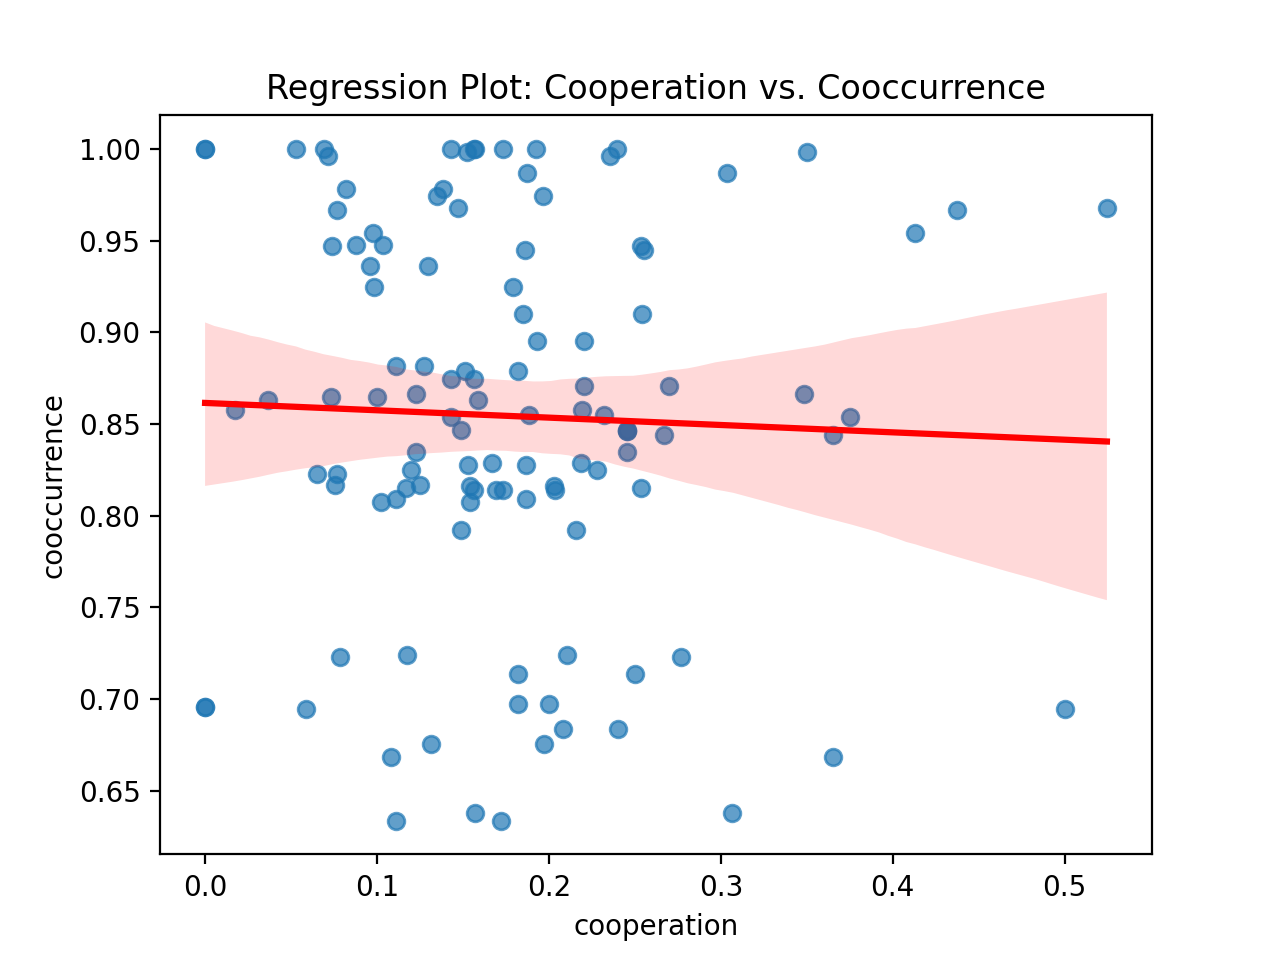

In [55]:
sns.regplot(x=df["cooperation"], y=df["cooccurrence"], scatter_kws={"alpha": 0.7}, line_kws={"color": "red"})
plt.title("Regression Plot: Cooperation vs. Cooccurrence")
plt.show()

In [56]:
from scipy.stats import pearsonr, spearmanr
df = pd.DataFrame.from_dict(neg_weight_scores, orient="index")
df = df.astype(float) 
df.head()

pearson_corr, _ = pearsonr(df["cooperation"], df["depletion"])
print("Pearson correlation:", pearson_corr)

# Spearman correlation (if the relationship is non-linear)
spearman_corr, _ = spearmanr(df["cooperation"], df["depletion"])
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.321522862411514
Spearman correlation: -0.22929268568287528


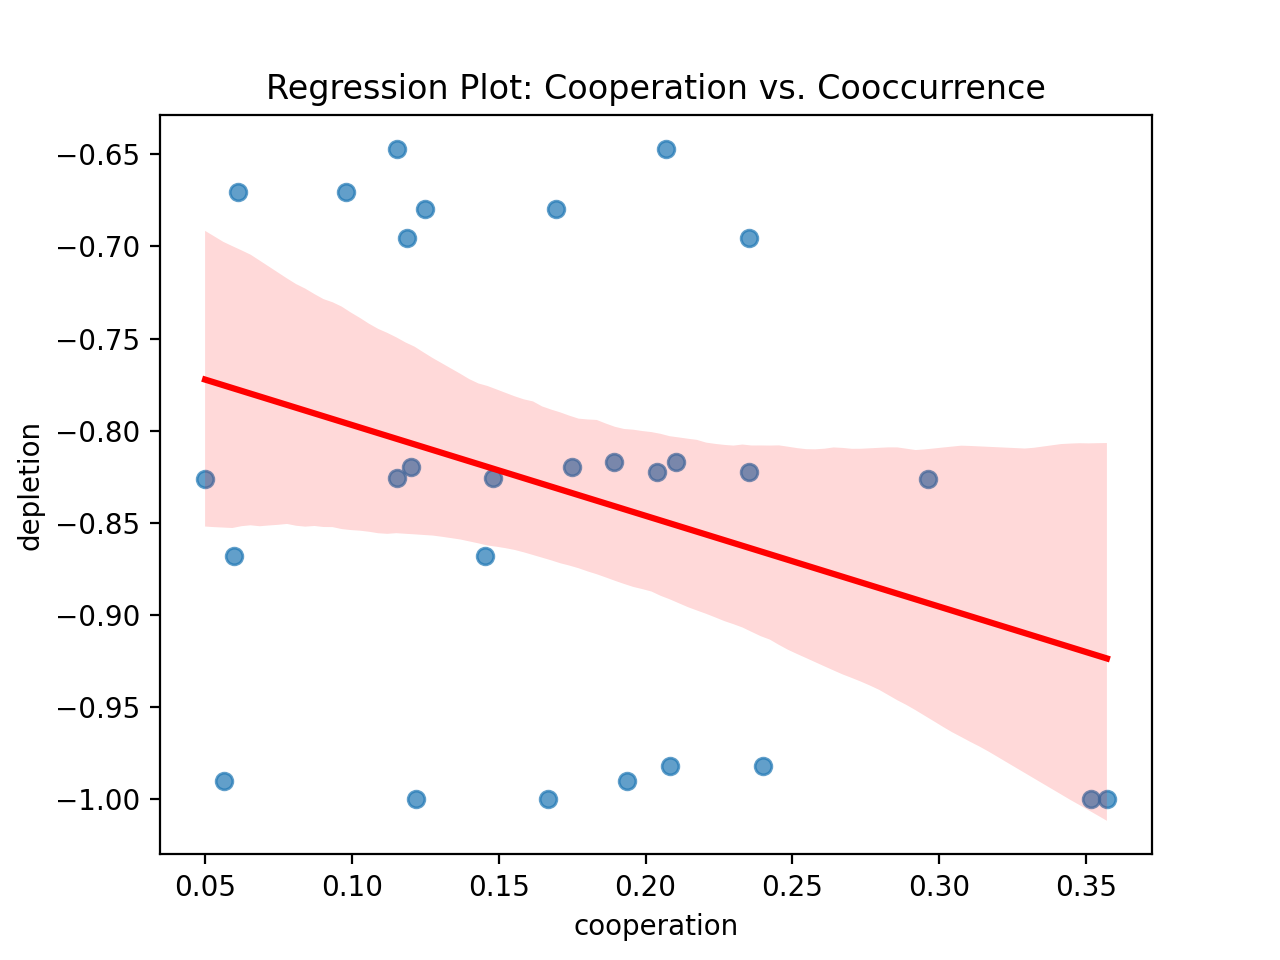

In [57]:
sns.regplot(x=df["cooperation"], y=df["depletion"], scatter_kws={"alpha": 0.7}, line_kws={"color": "red"})
plt.title("Regression Plot: Cooperation vs. Cooccurrence")
plt.show()

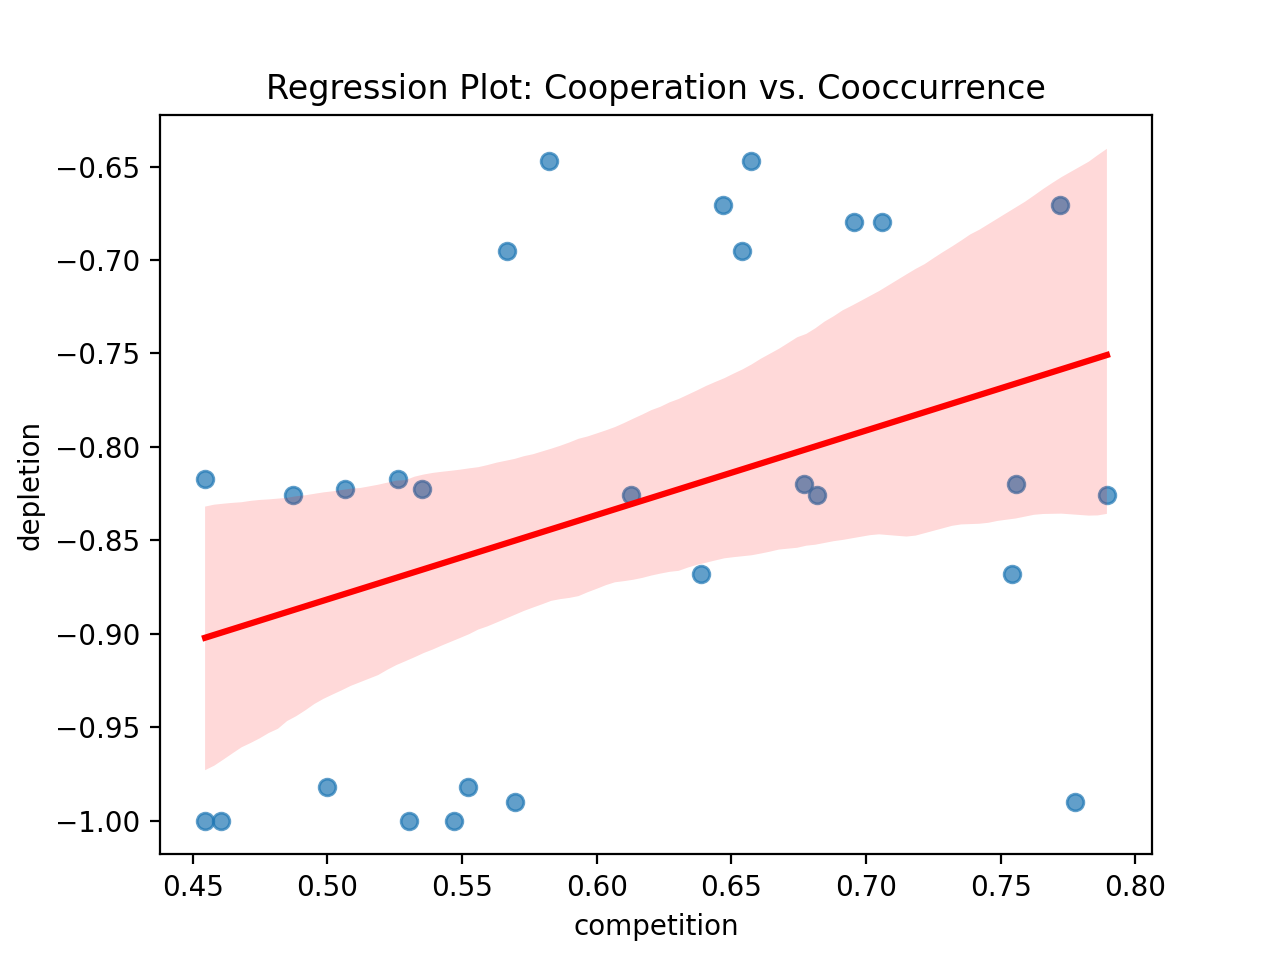

In [58]:
sns.regplot(x=df["competition"], y=df["depletion"], scatter_kws={"alpha": 0.7}, line_kws={"color": "red"})
plt.title("Regression Plot: Cooperation vs. Cooccurrence")
plt.show()

In [61]:
day_cx_objects = {
    "day07": cx_07,
    "day14": cx_14,
    "day21": cx_21,
    "day28": cx_28,
    "day35": cx_35
}

all_scores = {
    day: compute_weight_scores(cx_net, days_parsed_nets[day])
    for day, cx_net in day_cx_objects.items()  # Assuming `cx_objects` stores CX networks for each day
}

In [62]:
import scipy.stats as stats

def plot_regression(ax, df, x_col, y_col, title):
    """Plots a regression plot on the given Axes object and includes p-value and R-squared."""
    # Perform linear regression to get p-value and R-squared
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])
    r_squared = r_value**2
    
    # Create the regression plot
    sns.regplot(x=df[x_col], y=df[y_col], scatter_kws={"alpha": 0.7}, line_kws={"color": "red"}, ax=ax)
    
    # Add p-value and R-squared to the title
    ax.set_title(f"{title}\n$R^2$ = {r_squared:.2f}, p-value = {p_value:.4f}")

# def plot_regression(ax, df, x1_col, x2_col, y_col, title, color1="red", color2="blue"):
#     """Plots two regression plots on the same Axes object and includes p-value & R-squared."""
    
#     # First regression (x1_col vs y_col)
#     slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df[x1_col], df[y_col])
#     r_squared1 = r_value1**2
#     sns.regplot(x=df[x1_col], y=df[y_col], scatter_kws={"alpha": 0.7}, line_kws={"color": color1}, ax=ax, label=f"{x1_col} (R²={r_squared1:.2f}, p={p_value1:.4f})")
    
#     # Second regression (x2_col vs y_col)
#     slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df[x2_col], df[y_col])
#     r_squared2 = r_value2**2
#     sns.regplot(x=df[x2_col], y=df[y_col], scatter_kws={"alpha": 0.7}, line_kws={"color": color2}, ax=ax, label=f"{x2_col} (R²={r_squared2:.2f}, p={p_value2:.4f})")
    
#     # Titles and legend
#     ax.set_title(title)
#     ax.legend()


def plot_dual_regression(ax, df, x_col, y1_col, y2_col, title, color1="blue", color2="red"):
    """Plots two regressions with separate y-axes: one for y1_col (left) and y2_col (right)."""
    
    # Left Y-axis (cooperation vs cooccurrence)
    ax1 = ax
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df[x_col], df[y1_col])
    r_squared1 = r_value1**2
    sns.regplot(x=df[x_col], y=df[y1_col], scatter_kws={"alpha": 0.7}, line_kws={"color": color1}, ax=ax1)
    ax1.set_ylabel(y1_col, color=color1)
    ax1.tick_params(axis="y", colors=color1)
    
    # Right Y-axis (competition vs cooccurrence)
    ax2 = ax1.twinx()
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df[x_col], df[y2_col])
    r_squared2 = r_value2**2
    sns.regplot(x=df[x_col], y=df[y2_col], scatter_kws={"alpha": 0.3, "color": "red"}, line_kws={"color": color2}, ax=ax2)
    ax2.set_ylabel(y2_col, color=color2)
    ax2.tick_params(axis="y", colors=color2)

    # Titles
    ax1.set_xlabel(x_col)
    ax1.set_title(f"{title}\n{y1_col}: R²={r_squared1:.2f}, p={p_value1:.4f} | {y2_col}: R²={r_squared2:.2f}, p={p_value2:.4f}")




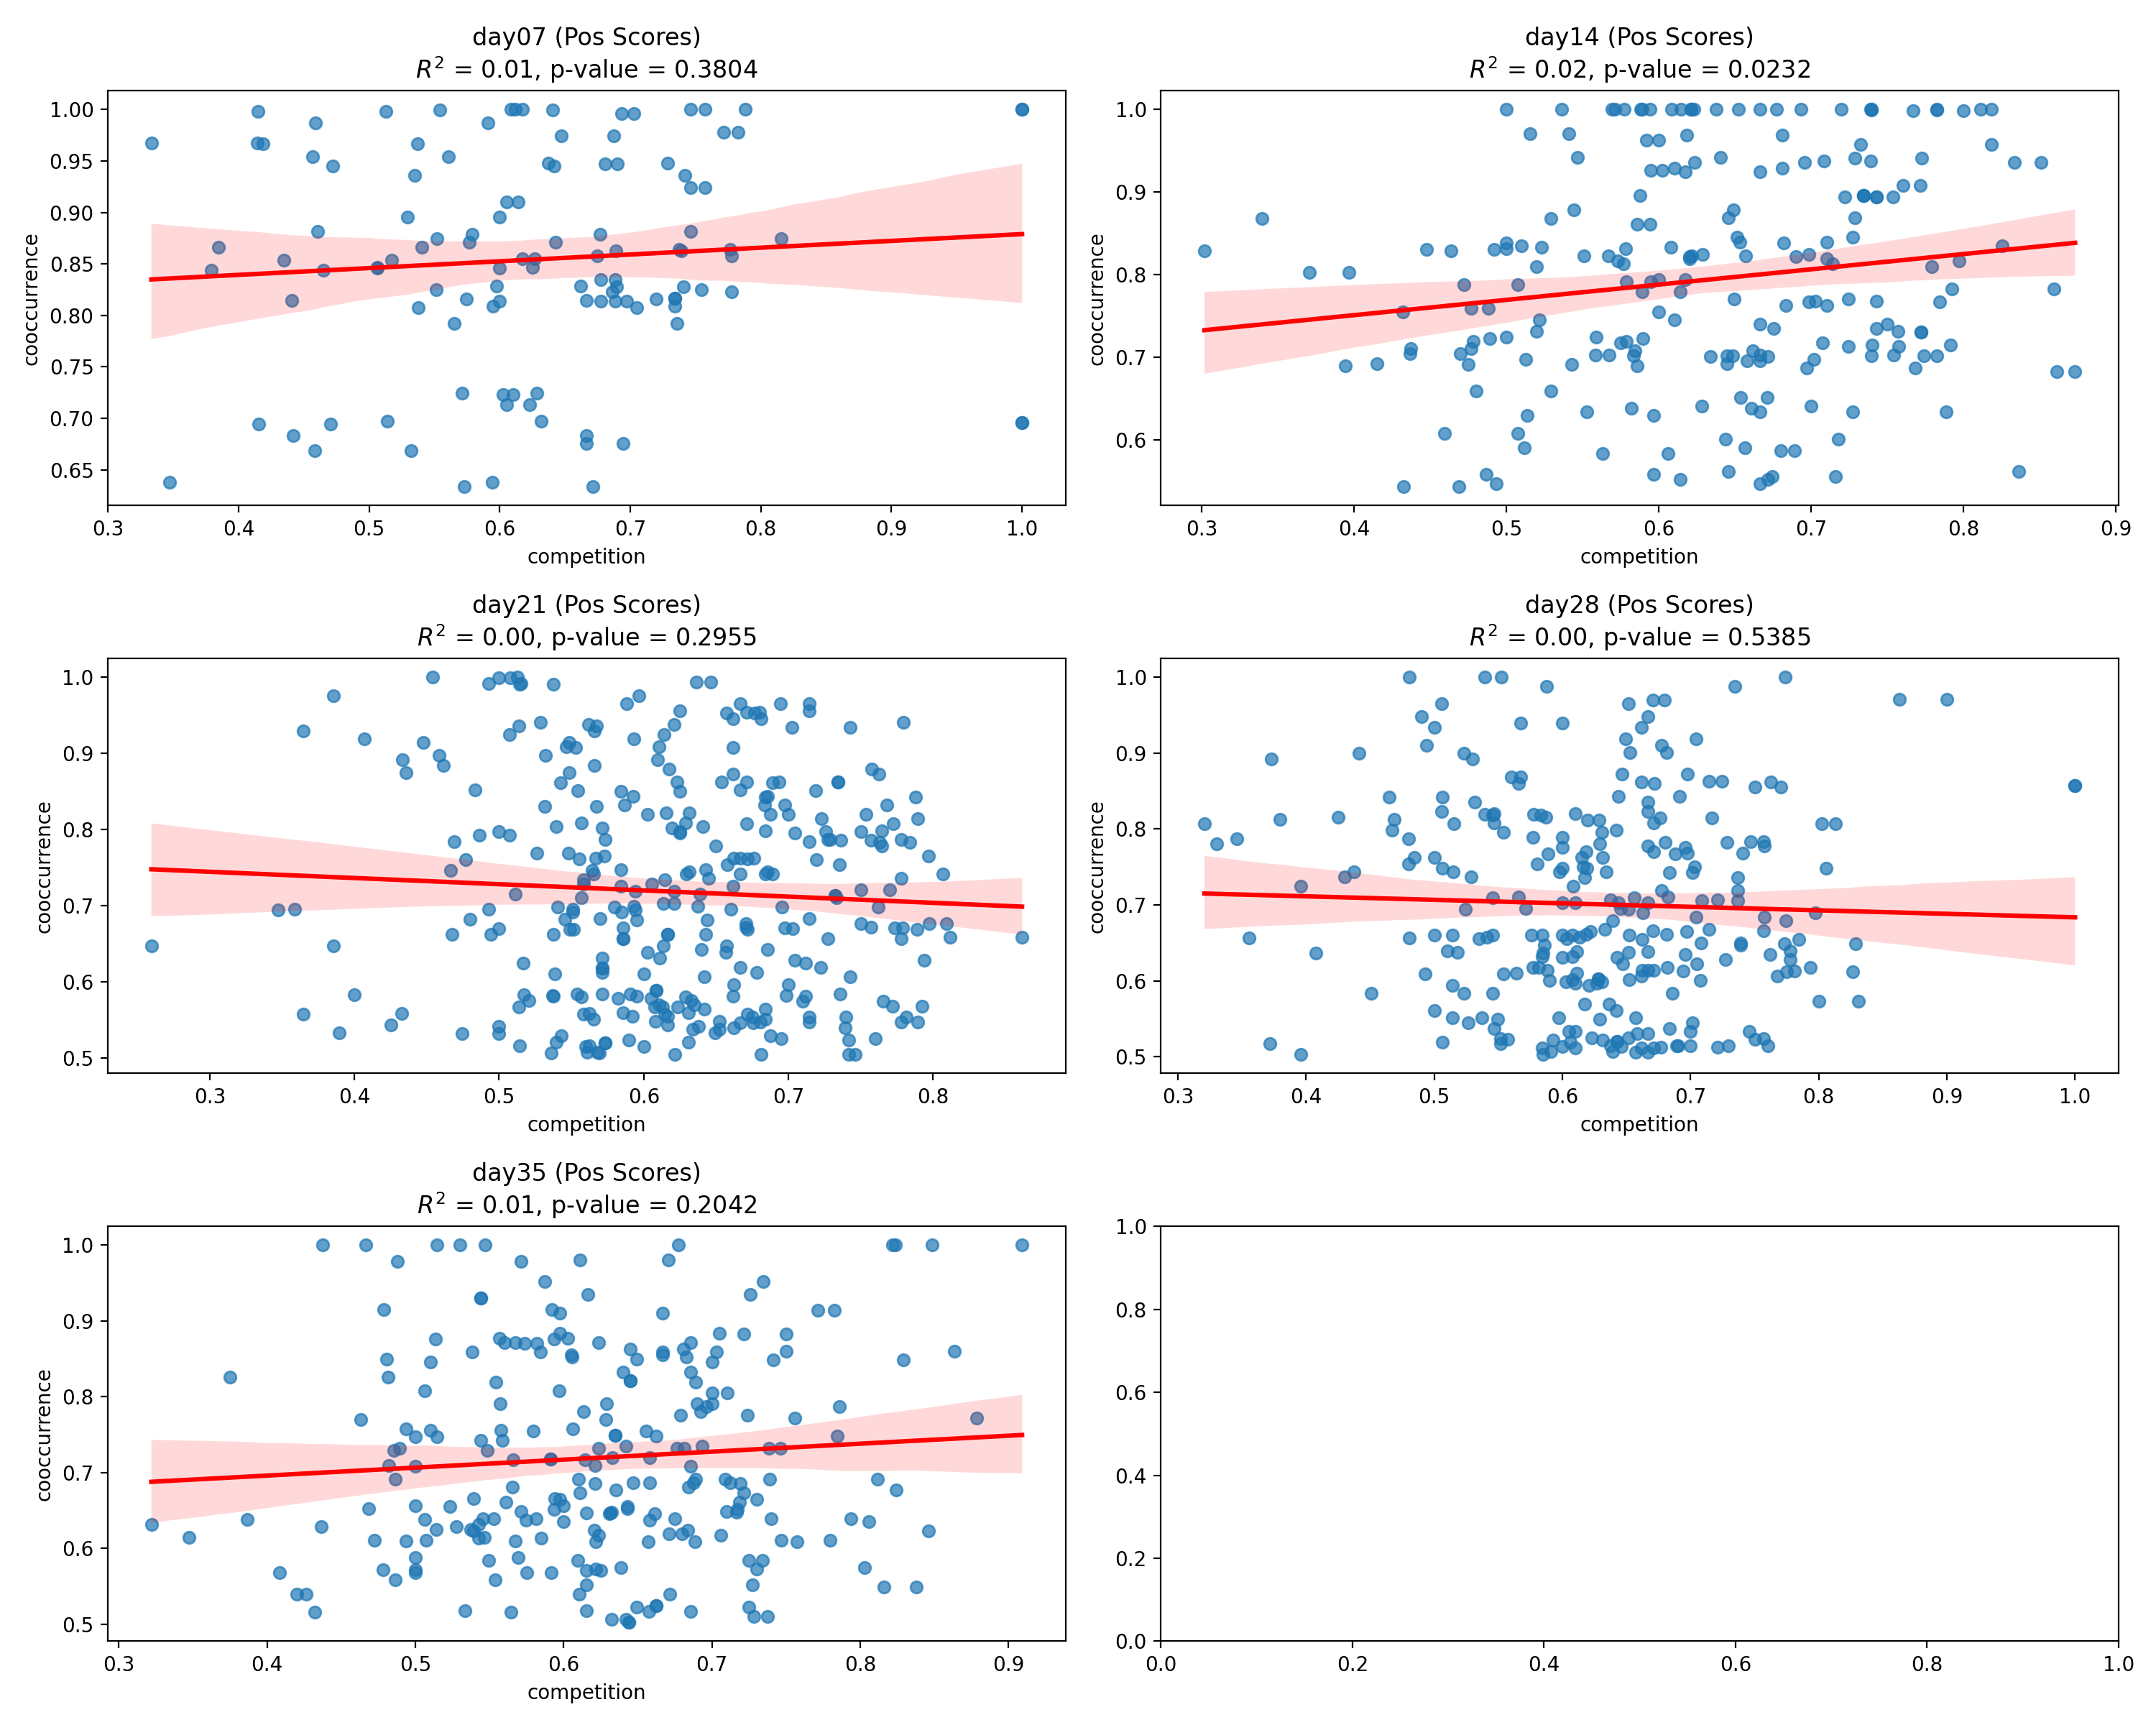

In [63]:
# Define figure with 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over networks & plot
for i, (day, scores) in enumerate(all_scores.items()):
    if i >= 6:  # Limit to 6 plots (3×2 grid)
        break

    # Handle positive weight scores
    pos_scores = scores["pos"]
    pos_df = pd.DataFrame.from_dict(pos_scores, orient="index")
    pos_df = pos_df.apply(pd.to_numeric, errors="coerce").dropna()  # Ensure numeric values and drop NaN rows
    
    if not pos_df.empty:  # Plot positive weight scores
        plot_regression(axes[i], pos_df, "competition", "cooccurrence", f"{day} (Pos Scores)")
        # plot_regression(axes[i], pos_df, "cooperation", "cooccurrence", f"{day} (Pos Scores)")
        # plot_dual_regression(axes[i], pos_df, "cooccurrence", "cooperation", "competition", f"{day} (Pos Scores)")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

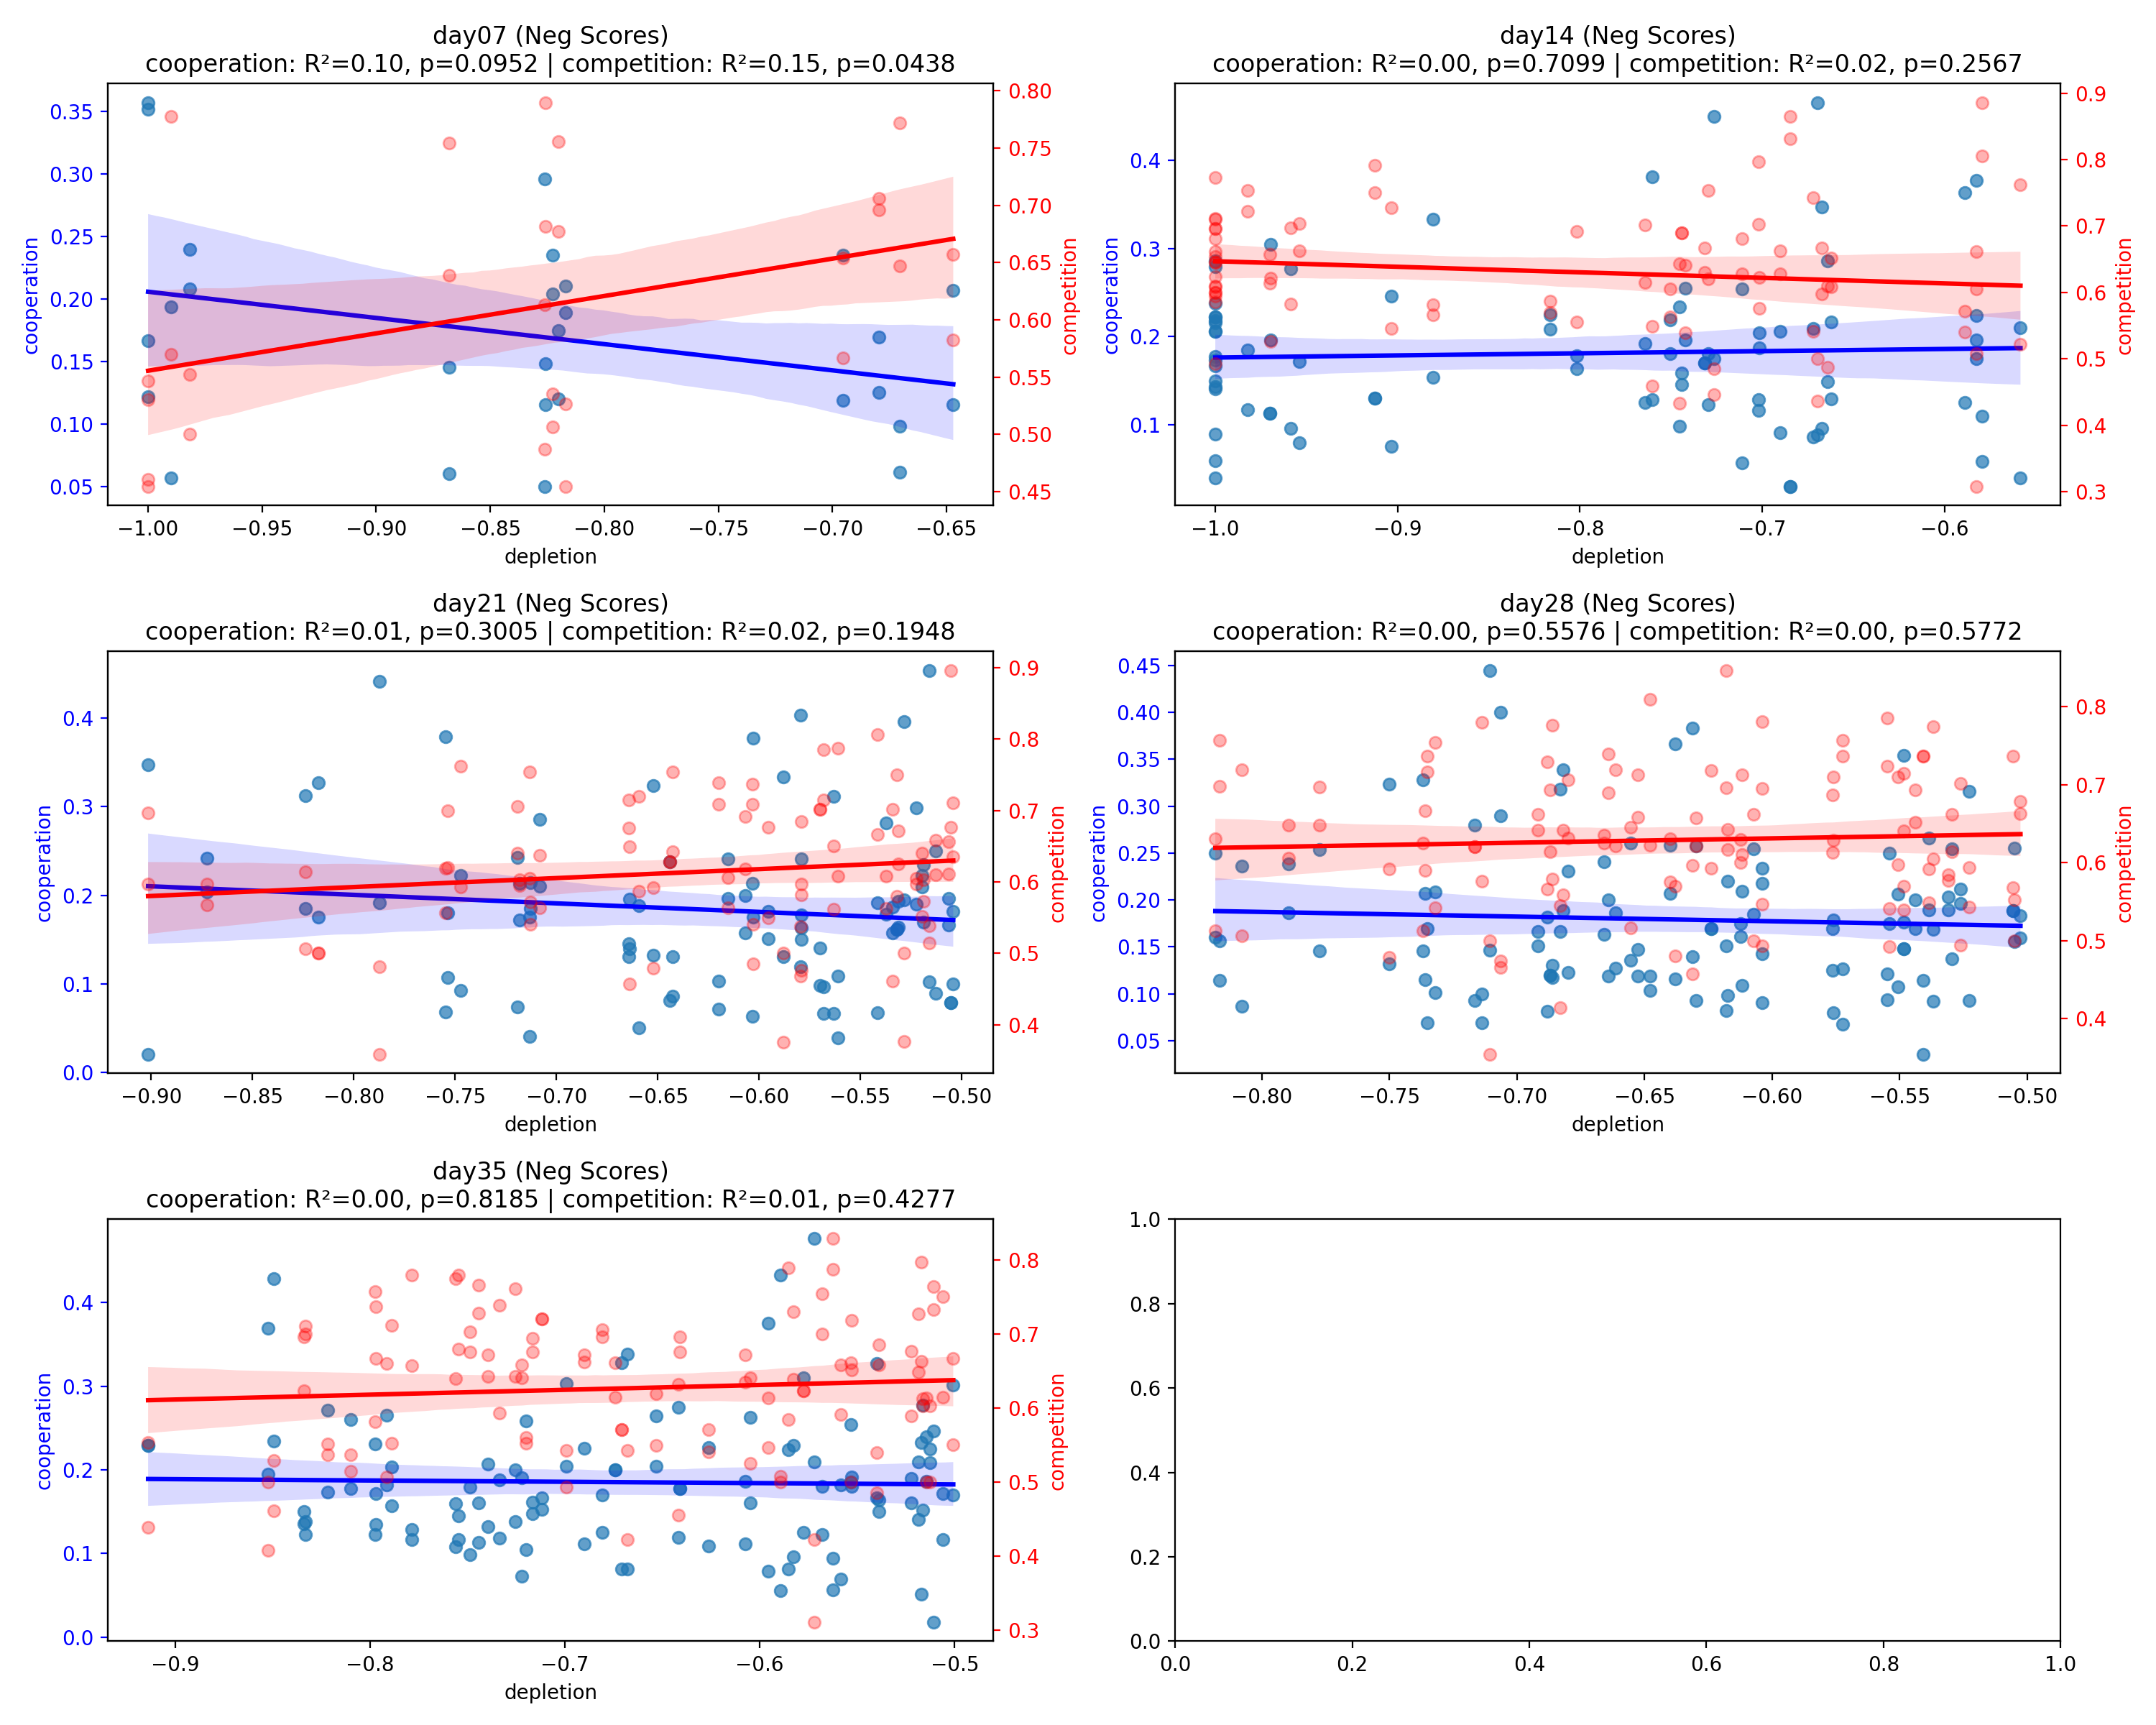

In [64]:
# Define figure with 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over networks & plot
for i, (day, scores) in enumerate(all_scores.items()):
 
    # Handle negative weight scores (next available subplot)
    neg_scores = scores["neg"]
    neg_df = pd.DataFrame.from_dict(neg_scores, orient="index")
    neg_df = neg_df.apply(pd.to_numeric, errors="coerce").dropna()  # Ensure numeric values and drop NaN rows
    
    if not neg_df.empty:  # Plot negative weight scores in the next available subplot
        if i + 1 < 6:  # Ensure we don't exceed the grid
            # plot_regression(axes[i + 1], neg_df, "competition", "depletion", f"{day} (Neg Scores)")
            # plot_regression(axes[i + 1], neg_df, "cooperation", "depletion", f"{day} (Neg Scores)")
            plot_dual_regression(axes[i], neg_df, "depletion", "cooperation", "competition", f"{day} (Neg Scores)")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Per treatment

#### Prep

In [65]:
cx_tg1_filepath = os.path.join(cx_dir, "microbetag_net_TG1.cx2") ; cx_tg_1 = load_cx2(cx_tg1_filepath)
cx_tg2_filepath = os.path.join(cx_dir, "microbetag_net_TG2.cx2") ; cx_tg_2 = load_cx2(cx_tg2_filepath)
cx_tg3_filepath = os.path.join(cx_dir, "microbetag_net_TG3.cx2") ; cx_tg_3 = load_cx2(cx_tg3_filepath)
cx_tg4_filepath = os.path.join(cx_dir, "microbetag_net_TG4.cx2") ; cx_tg_4 = load_cx2(cx_tg4_filepath)
cx_tg5_filepath = os.path.join(cx_dir, "microbetag_net_TG5.cx2") ; cx_tg_5 = load_cx2(cx_tg5_filepath)

In [66]:
treatment_parsed_nets = {
    "TG1" : MggParser(cx_tg_1, env_set, metabolites_set),
    "TG2" : MggParser(cx_tg_2, env_set, metabolites_set),
    "TG3" : MggParser(cx_tg_3, env_set, metabolites_set),
    "TG4" : MggParser(cx_tg_4, env_set, metabolites_set),
    "TG5" : MggParser(cx_tg_5, env_set, metabolites_set)
}

In [67]:
treatment_cx_objects = {
    "TG1": cx_tg_1,
    "TG2": cx_tg_2,
    "TG3": cx_tg_3,
    "TG4": cx_tg_4,
    "TG5": cx_tg_5
}

In [68]:
all_scores_treatments = {
    treatment: compute_weight_scores(cx_net, treatment_parsed_nets[treatment])
    for treatment, cx_net in treatment_cx_objects.items()  # Assuming `cx_objects` stores CX networks for each day
}

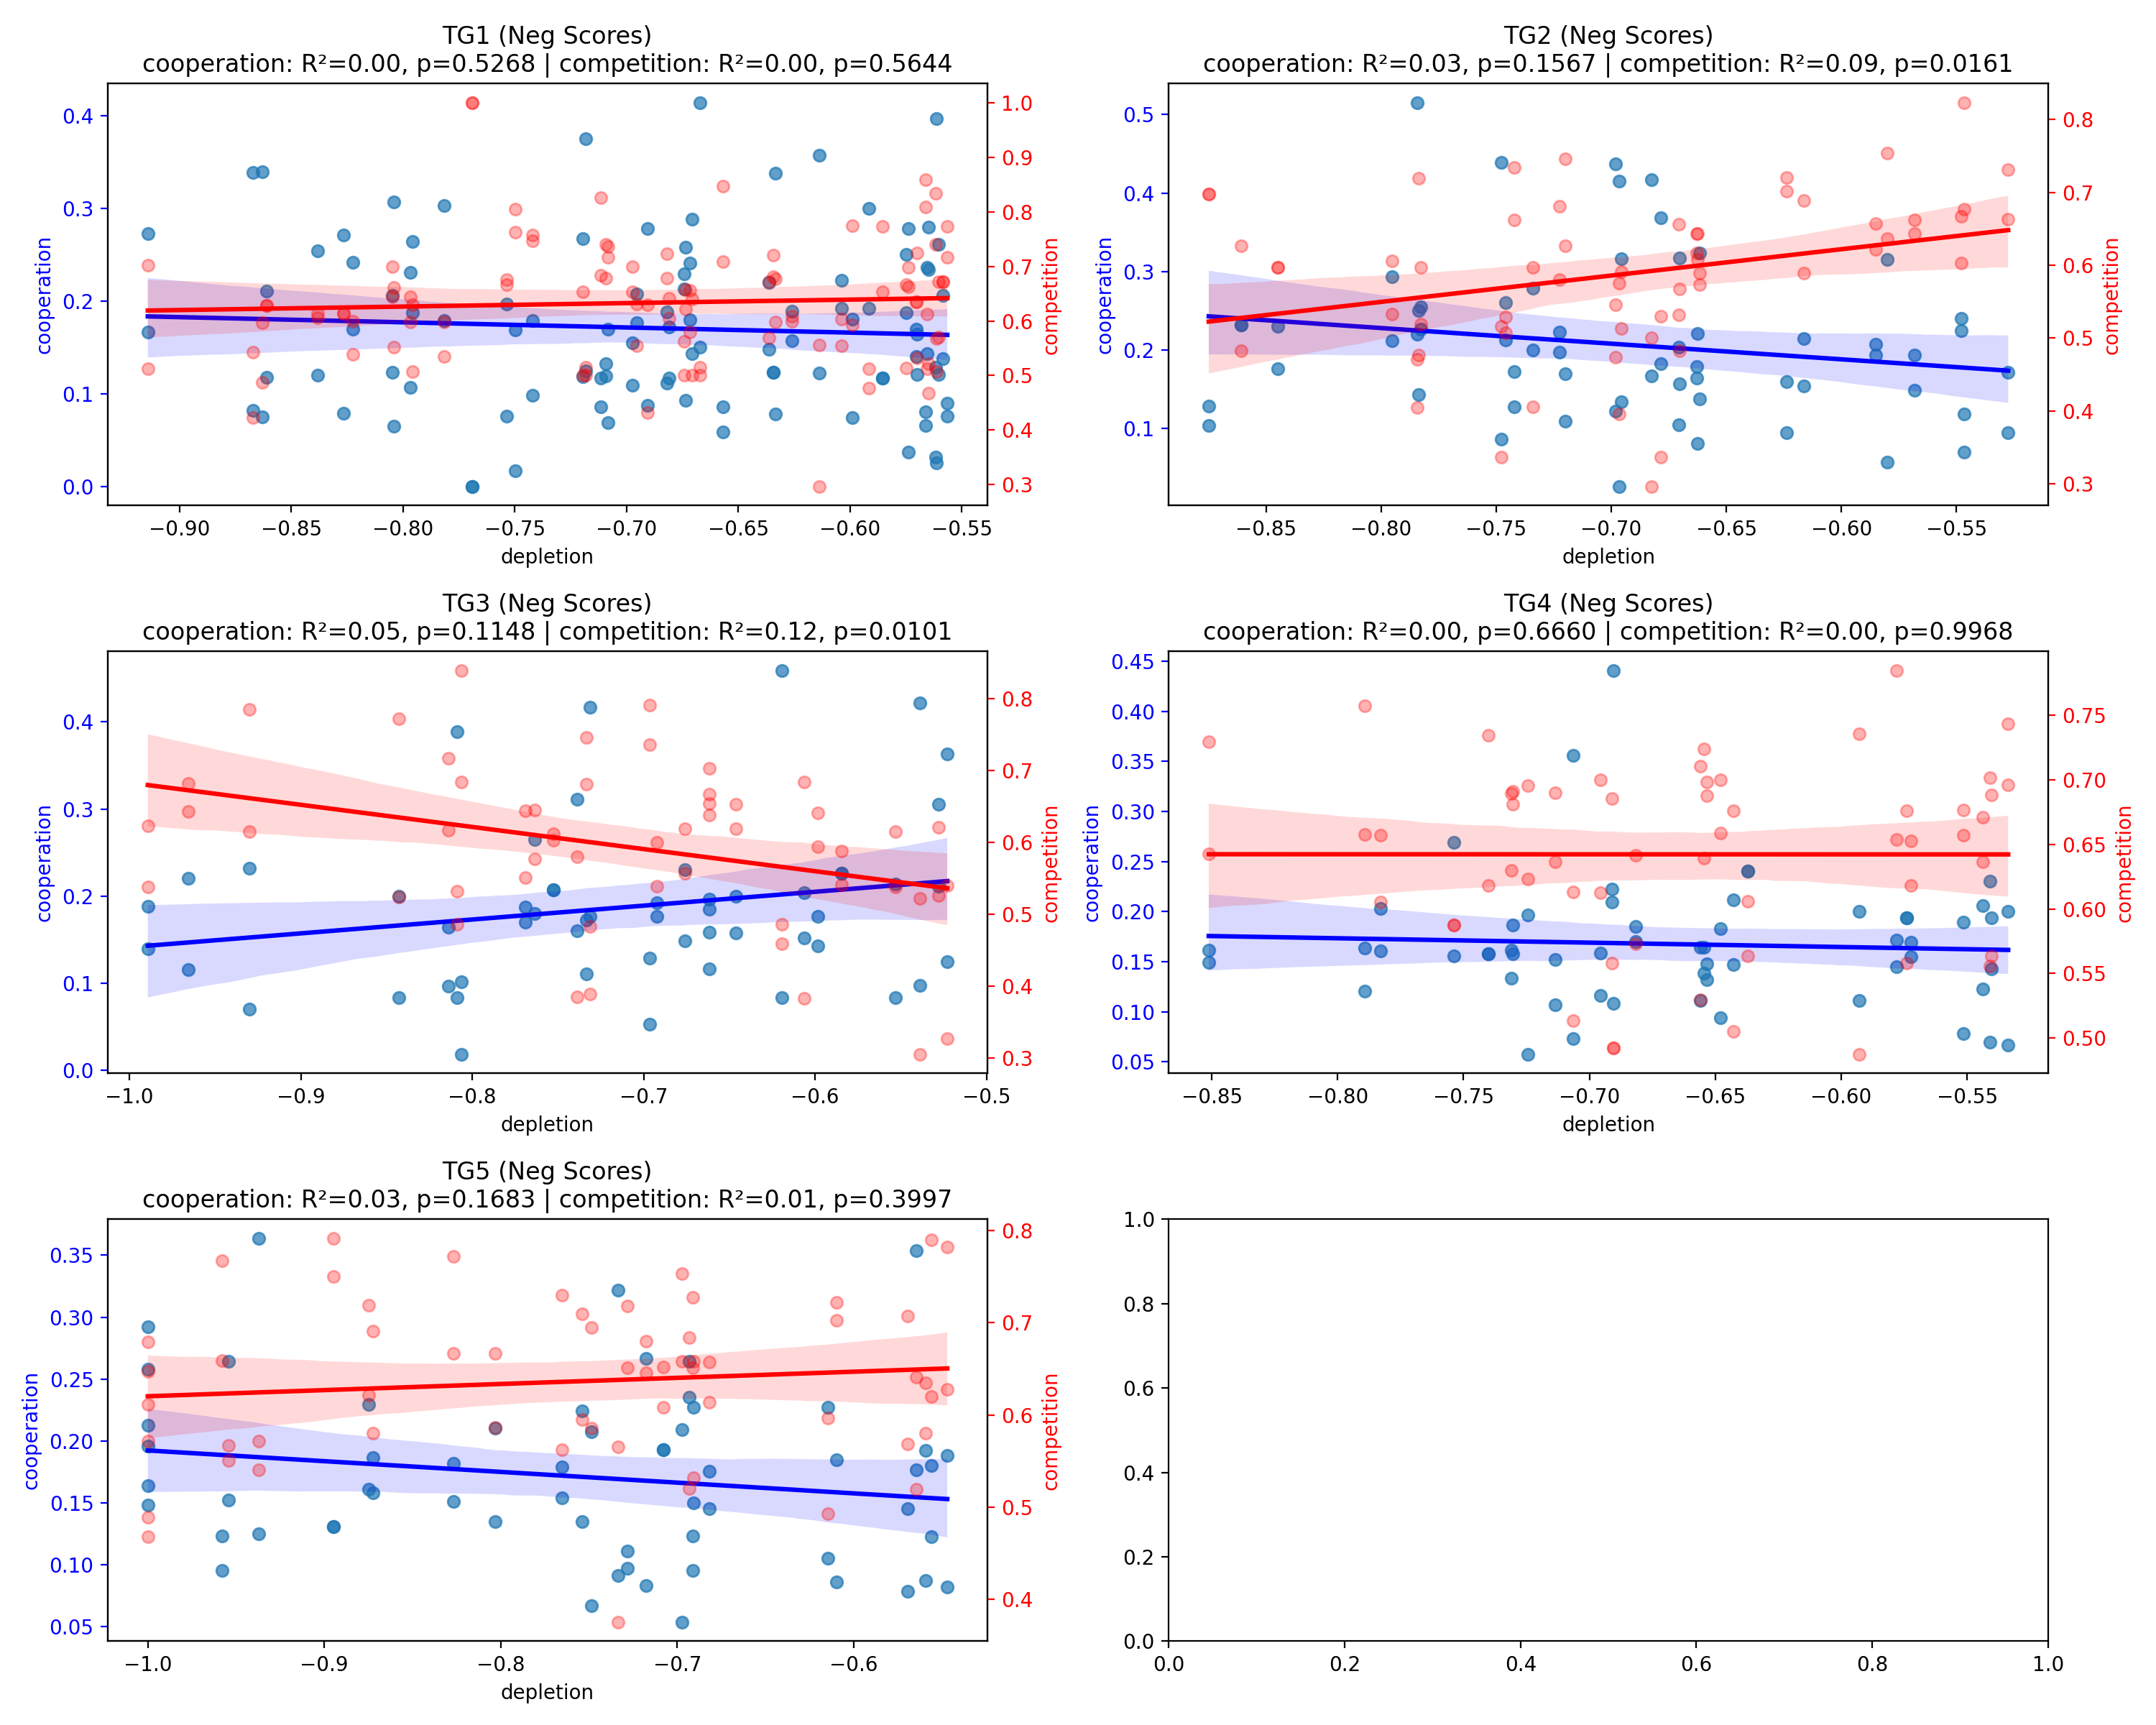

In [69]:
# Define figure with 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over networks & plot
for i, (day, scores) in enumerate(all_scores_treatments.items()):
    if i >= 6:  # Limit to 6 plots (3×2 grid)
        break

    # Handle negative weight scores (next available subplot)
    neg_scores = scores["neg"]
    neg_df = pd.DataFrame.from_dict(neg_scores, orient="index")
    neg_df = neg_df.apply(pd.to_numeric, errors="coerce").dropna()  # Ensure numeric values and drop NaN rows
    
    if not neg_df.empty:  # Plot negative weight scores in the next available subplot
        if i + 1 < 6:  # Ensure we don't exceed the grid
            # plot_regression(axes[i + 1], neg_df, "competition", "depletion", f"{day} (Neg Scores)")
            plot_dual_regression(axes[i], neg_df, "depletion", "cooperation", "competition", f"{day} (Neg Scores)")

            

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

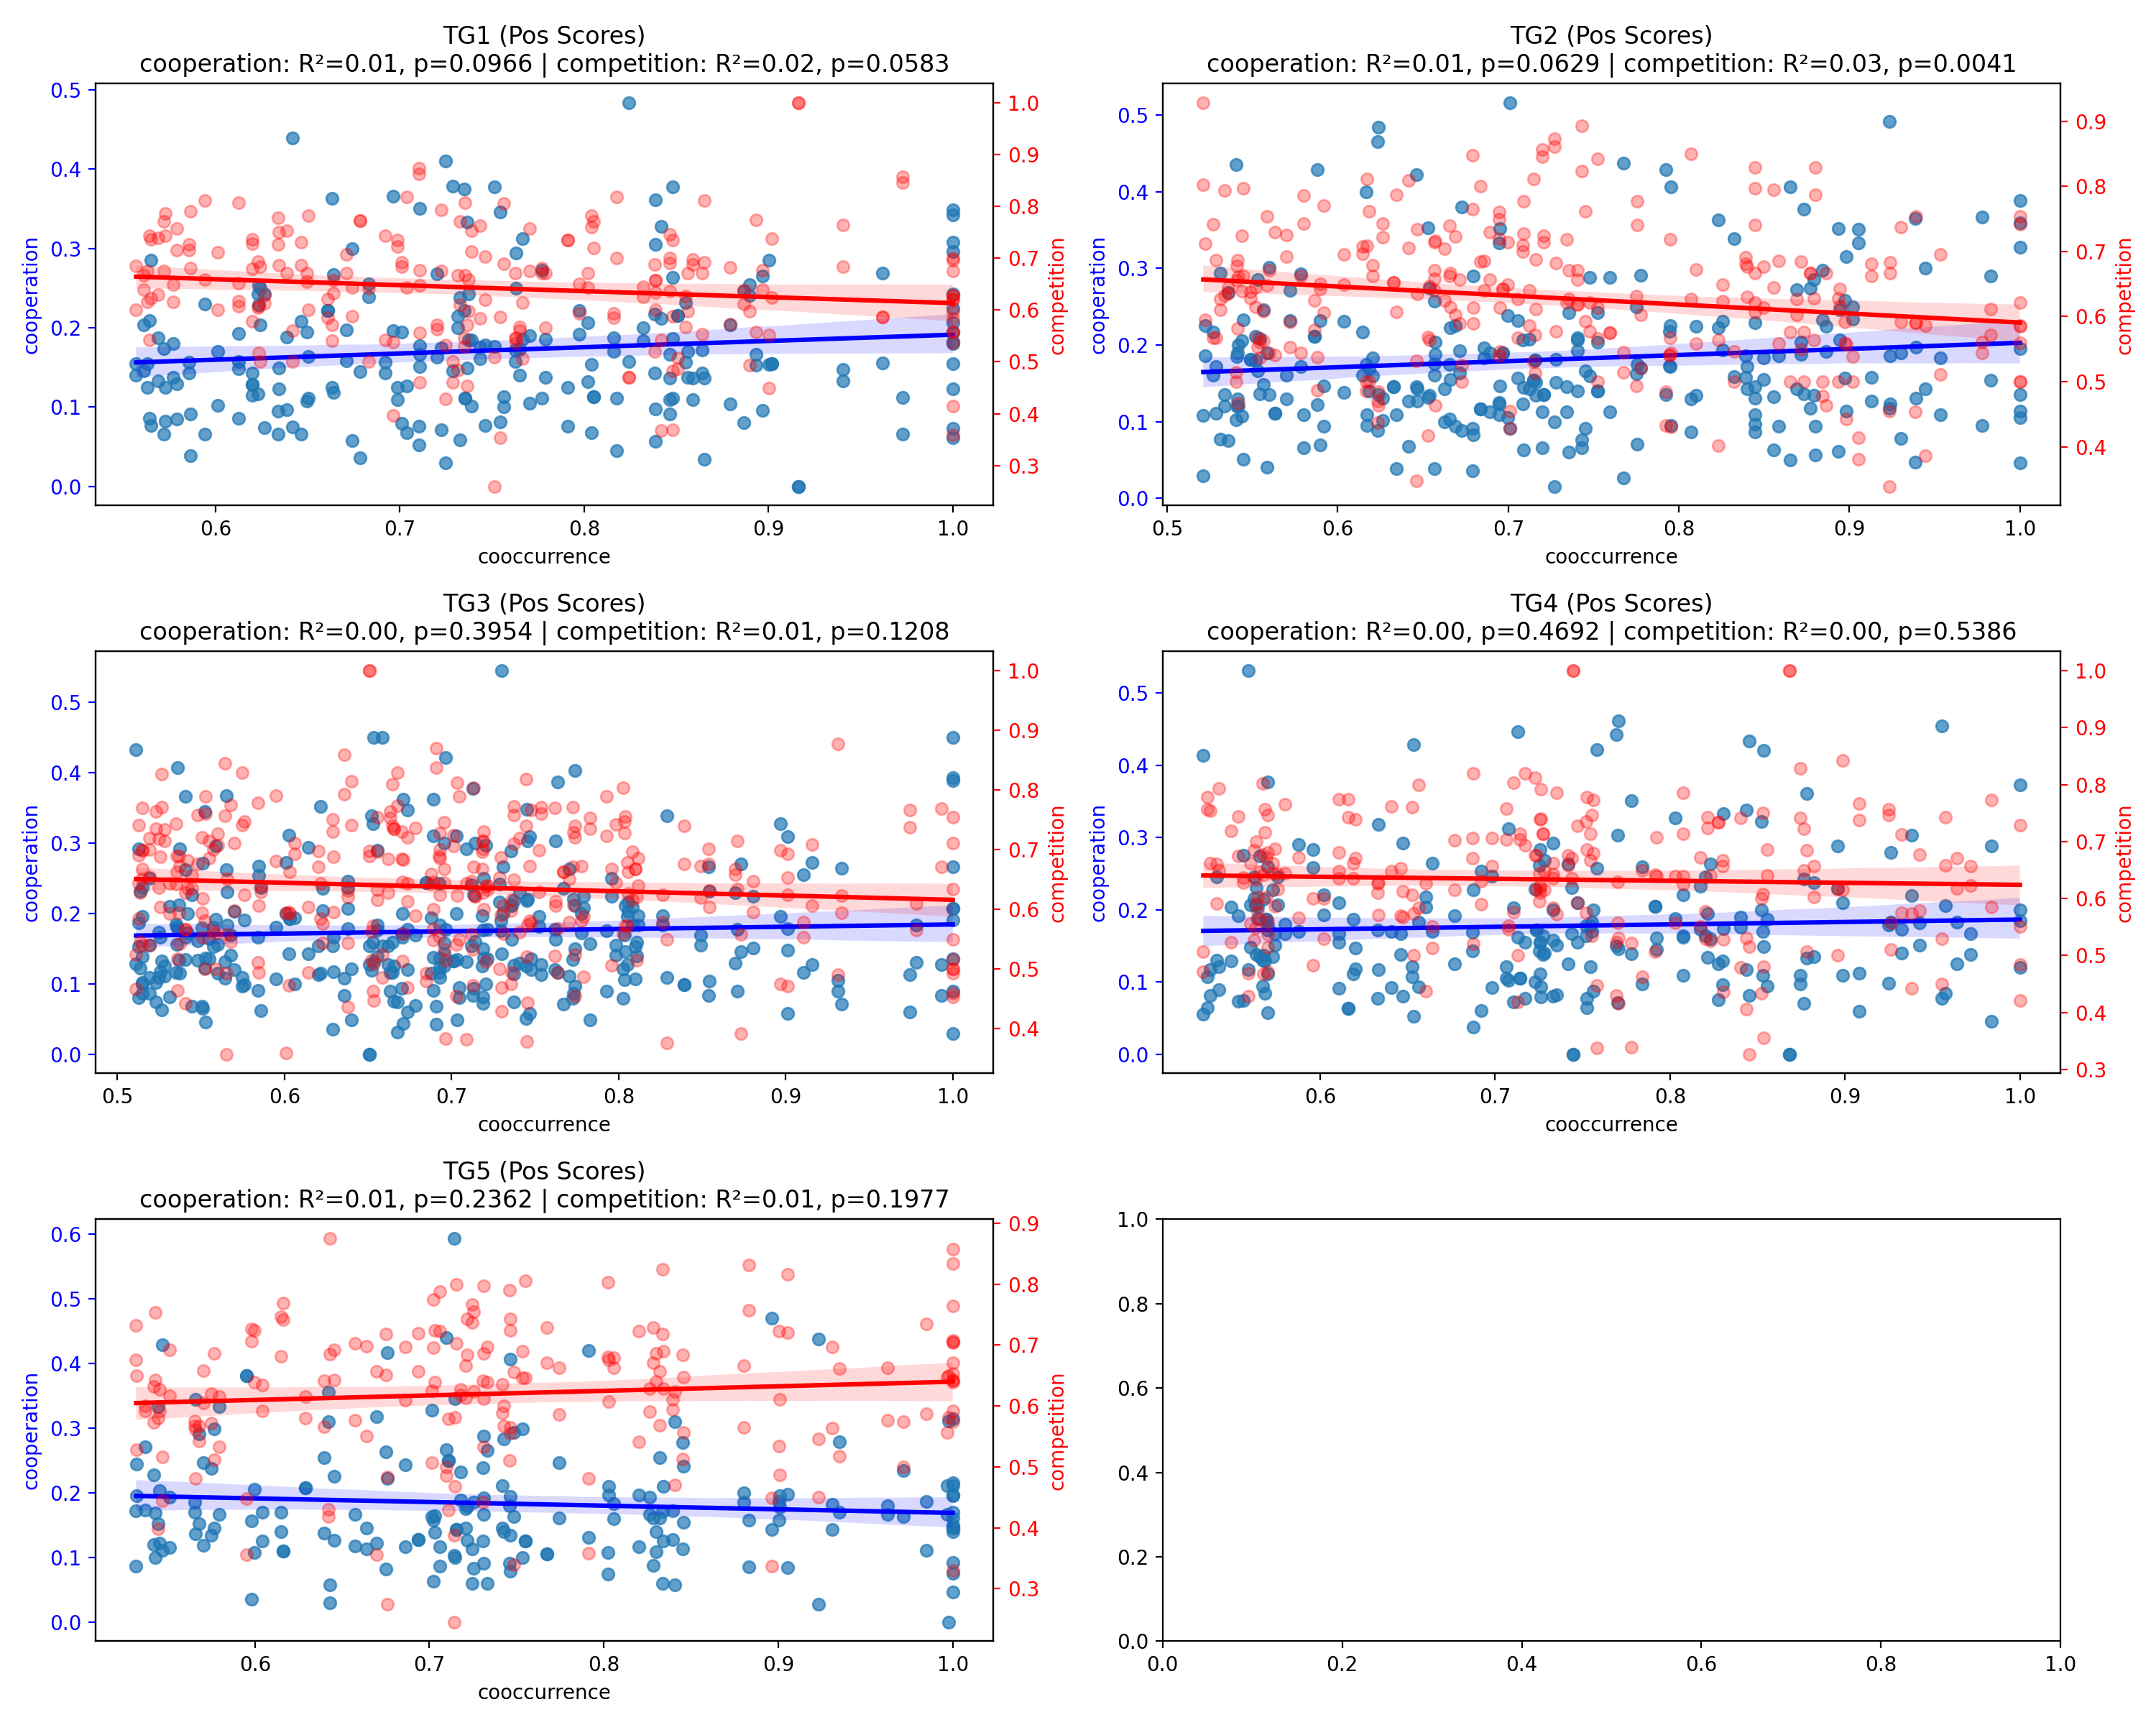

In [70]:
# Define figure with 3 rows × 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over networks & plot
for i, (day, scores) in enumerate(all_scores_treatments.items()):
    if i >= 6:  # Limit to 6 plots (3×2 grid)
        break
    # Handle positive weight scores
    pos_scores = scores["pos"]
    pos_df = pd.DataFrame.from_dict(pos_scores, orient="index")
    pos_df = pos_df.apply(pd.to_numeric, errors="coerce").dropna()  # Ensure numeric values and drop NaN rows
    if not pos_df.empty:  # Plot positive weight scores
        # plot_regression(axes[i], pos_df, "cooperation", "cooccurrence", f"{day} (Pos Scores)")
        plot_dual_regression(axes[i], pos_df, "cooccurrence", "cooperation", "competition", f"{day} (Pos Scores)")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
pos_df

cooperation  competition  cooccurrence
1       0.169231     0.641975      0.542909
2       0.100000     0.753623      0.542909
4       0.181818     0.697368      0.930933
5       0.142857     0.563830      0.930933
7       0.254237     0.641791      0.639670
..           ...          ...           ...
377     0.283333     0.600000      0.742562
379     0.241379     0.647059      0.845697
380     0.153846     0.556962      0.845697
382     0.246377     0.604651      0.570273
383     0.118644     0.658228      0.570273

[196 rows x 3 columns]

In [71]:
tg_microbetag_nets = [cx_tg_1, cx_tg_2, cx_tg_3, cx_tg_4, cx_tg_5]
treatments = ["TG1", "TG2", "TG3", "TG4", "TG5"]
treatments_descr = [
    "TG1:Salmonella, synbiont both water and feed",
    "TG2:Salmonella, synbiont in water",
    "TG3:Salmonella, synbiont in feed",
    "TG4:Salmonella, no symbiont",
    "TG5:No Salmonella, no symbiont"
]

In [72]:
parsed_tg_edges = []
for tg_mgg_net in tg_microbetag_nets:
    num_compl, types, pos_pairs, compounds = parse_microbetag_edges(tg_mgg_net, env_set=env_set, metabolites_set=metabolites_set)
    parsed_tg_edges.append([num_compl, types, pos_pairs, compounds])

#### Count the number of **taxon-metabolite associations** in the day-specific networks and correlate it with day

In [73]:
taxon_to_metabo_hits = [
    net.edge_types["taxon_to_metabo"]["counts"] for _, net in treatment_parsed_nets.items()
]

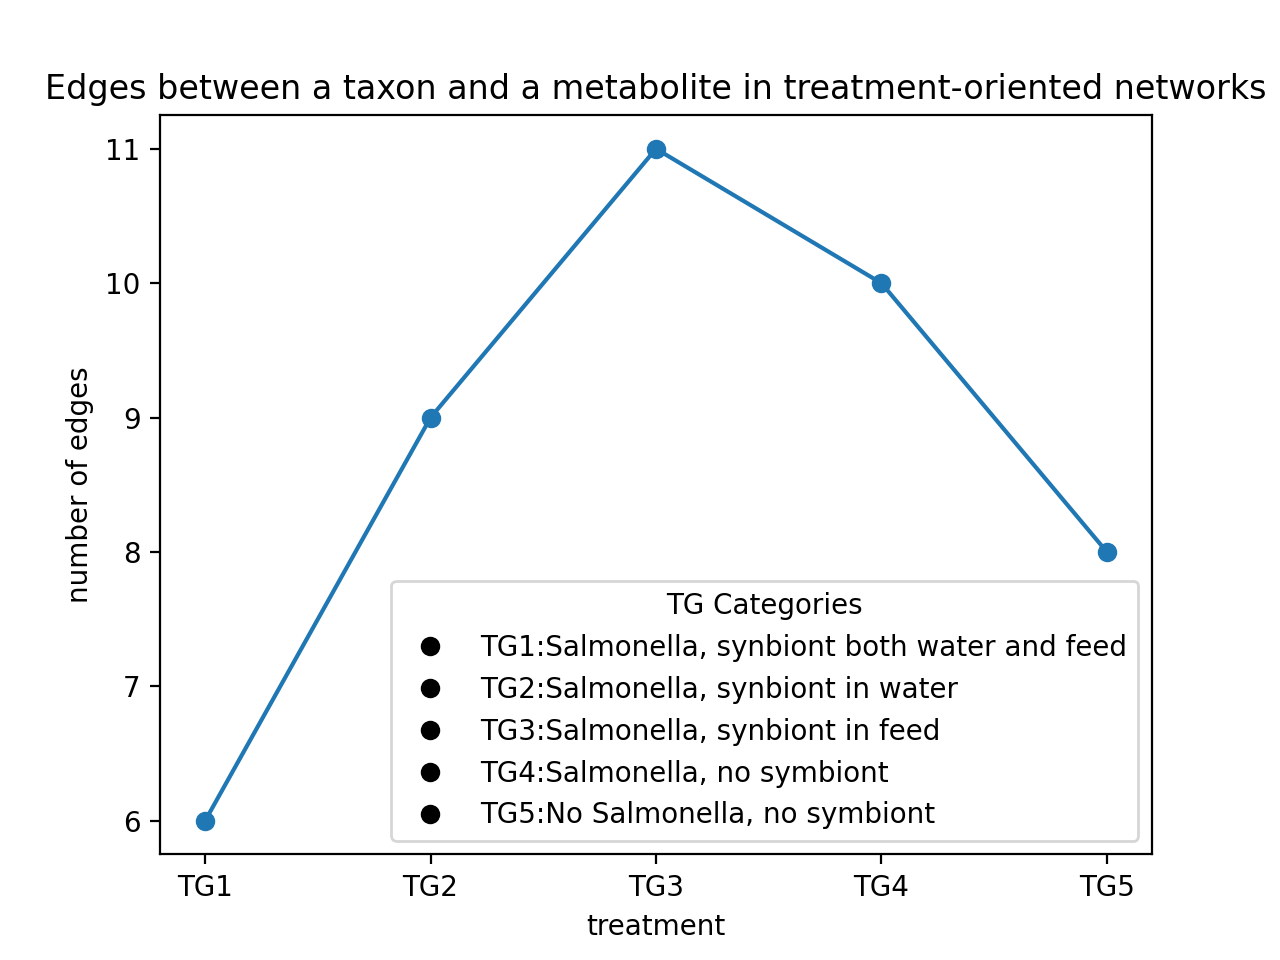

In [74]:
plt.plot(treatments, taxon_to_metabo_hits, marker='o', linestyle='-')
# Labels and title
plt.xlabel("treatment")
plt.ylabel("number of edges")
plt.title("Edges between a taxon and a metabolite in treatment-oriented networks")
# Create proxy artists for legend
legend_handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None', label=t) for t in treatments_descr]
# Add legend box
plt.legend(handles=legend_handles, title="TG Categories", loc="lower right", frameon=True)
plt.show()


#### Count the number of taxon-treatment associations in the day-specific networks

In [75]:
taxon_to_env_hits = [
    net.edge_types["taxon_to_env"]["counts"] for _, net in treatment_parsed_nets.items()
]

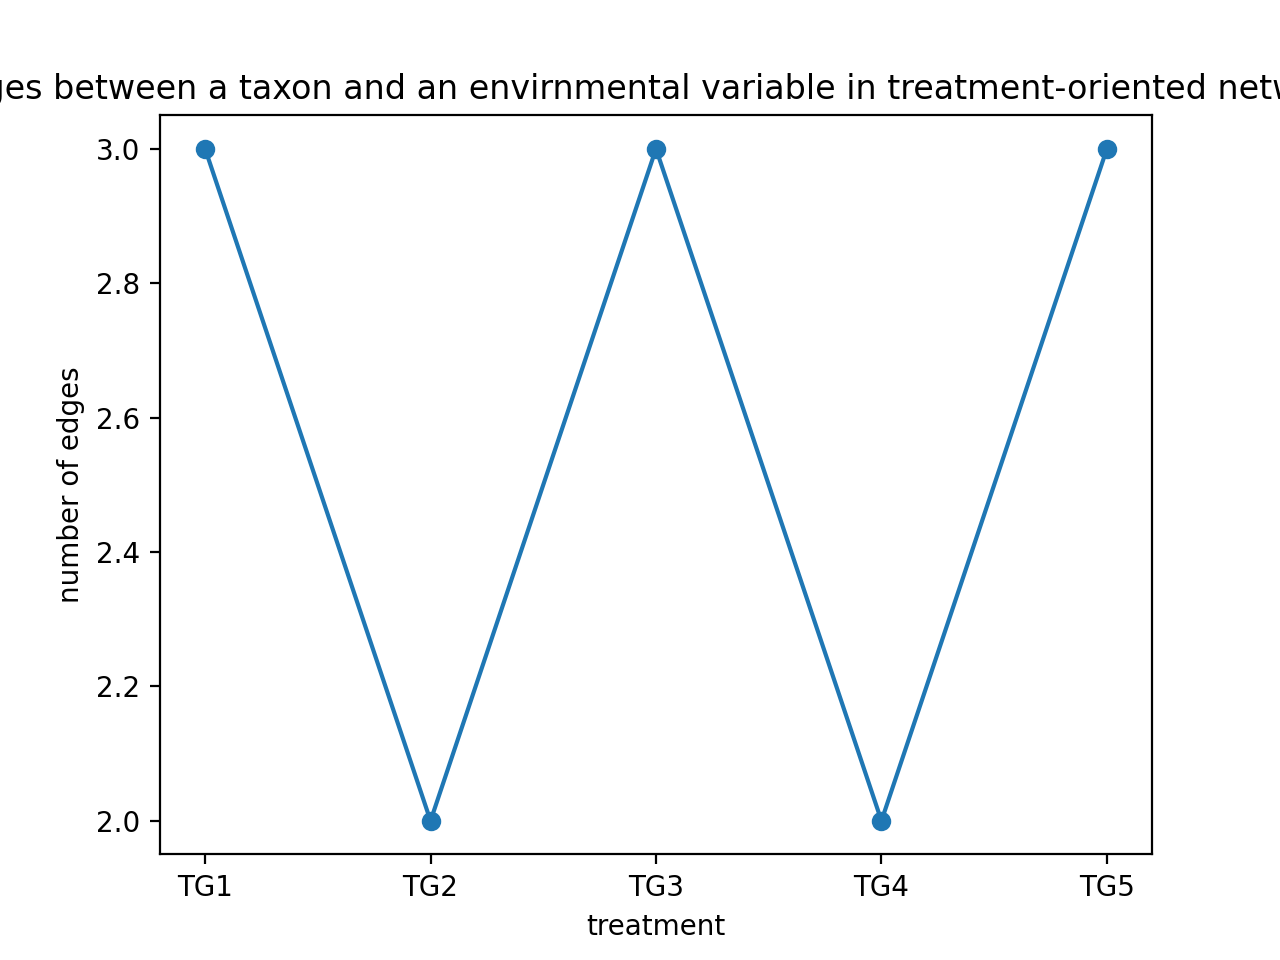

In [76]:
plt.plot(treatments, taxon_to_env_hits, marker='o', linestyle='-')
# Labels and title
plt.xlabel("treatment")
plt.ylabel("number of edges")
plt.title("Edges between a taxon and an envirnmental variable in treatment-oriented networks")

plt.show()

#### Correlate time vs total number of cross-feedings across day-specific networks

In [77]:
overall_number_of_seed_compl = [
    sum(net.num_total_compls.values()) for _, net in treatment_parsed_nets.items()
]

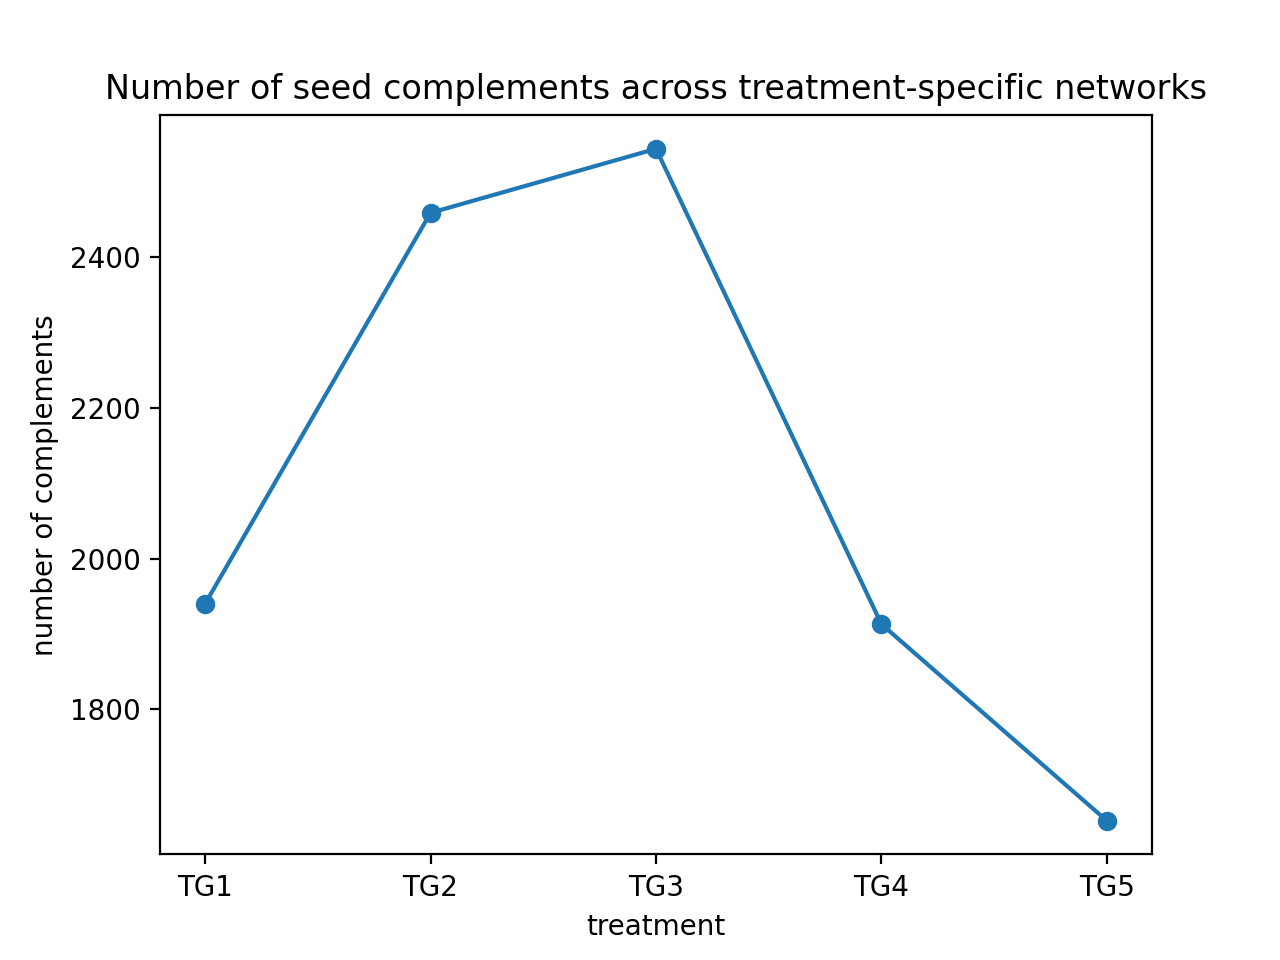

In [78]:
plt.plot(treatments, overall_number_of_seed_compl, marker='o', linestyle='-')

# Labels and title
plt.xlabel("treatment")
plt.ylabel("number of complements")
plt.title("Number of seed complements across treatment-specific networks")

# Show the plot
plt.show()

#### Correlation between number of positive taxon-to-taxon edged and predicted cross-feedings in day-specific networks 

In [79]:
number_of_seed_compl_per_day_in_positive_associated_taxa = [
    get_compls_and_compounds_in_positive_associated_taxa(
        net.cx2, 
        net.pos_pairs_node_ids, 
        net.num_total_compls, 
        net.edge_id_to_unique_compounds
        )[0] 
    for _, net in treatment_parsed_nets.items()
]

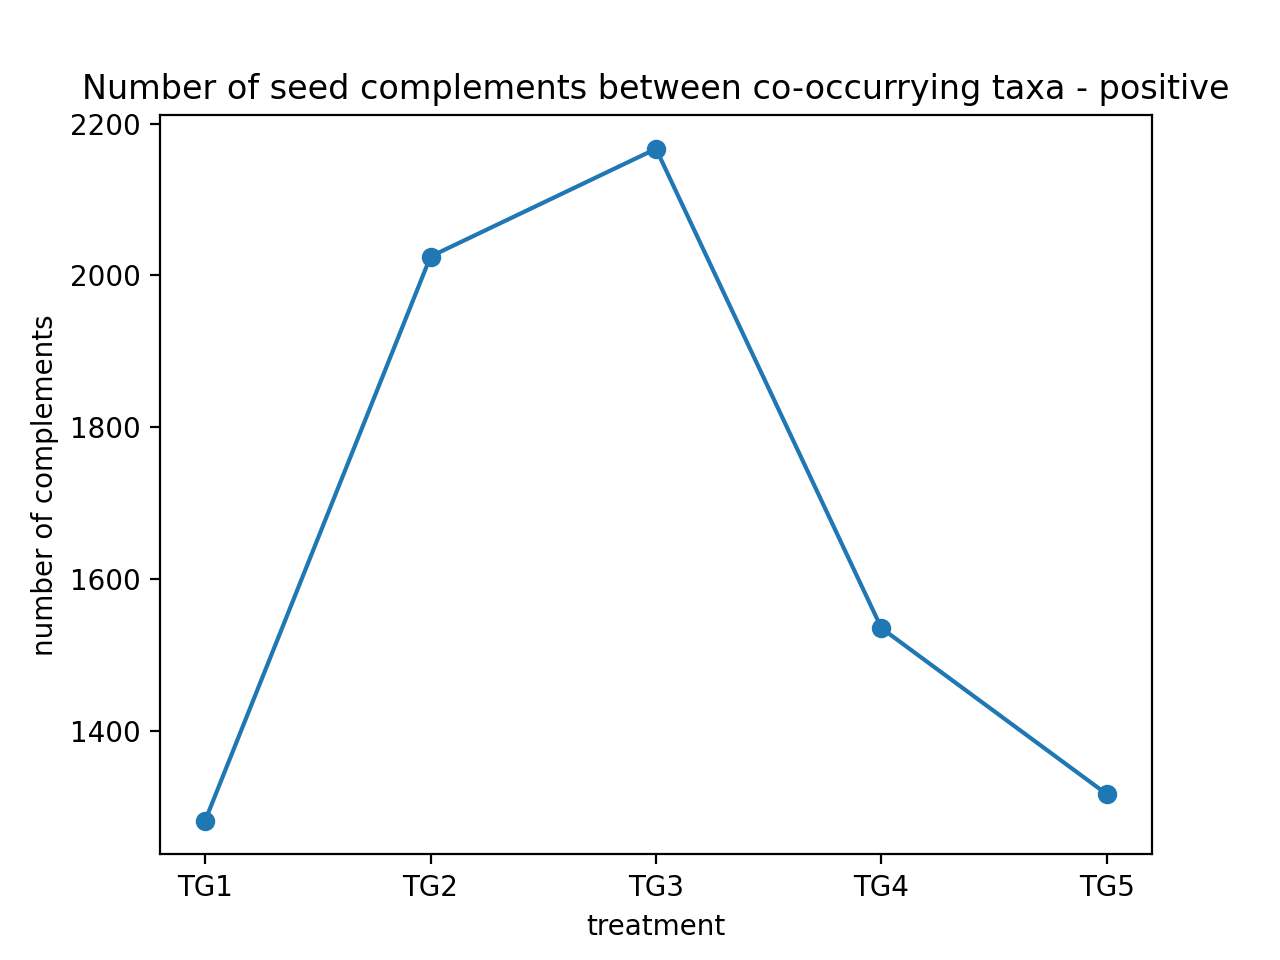

In [80]:
plt.plot(treatments, number_of_seed_compl_per_day_in_positive_associated_taxa, marker='o', linestyle='-')

# Labels and title
plt.xlabel("treatment")
plt.ylabel("number of complements")
plt.title("Number of seed complements between co-occurrying taxa - positive")

# Show the plot
plt.show()

In [81]:
mean_of_seed_compl_in_positive_associated_taxa = [
    number_of_seed_compl_per_day_in_positive_associated_taxa[index] / len(net.pos_pairs_node_ids) for index, net in enumerate(treatment_parsed_nets.values())
]
mean_overall_number_of_seed_compl = [
    overall_number_of_seed_compl[index] /  len(net.num_total_compls)  for index, net in enumerate(treatment_parsed_nets.values())
]

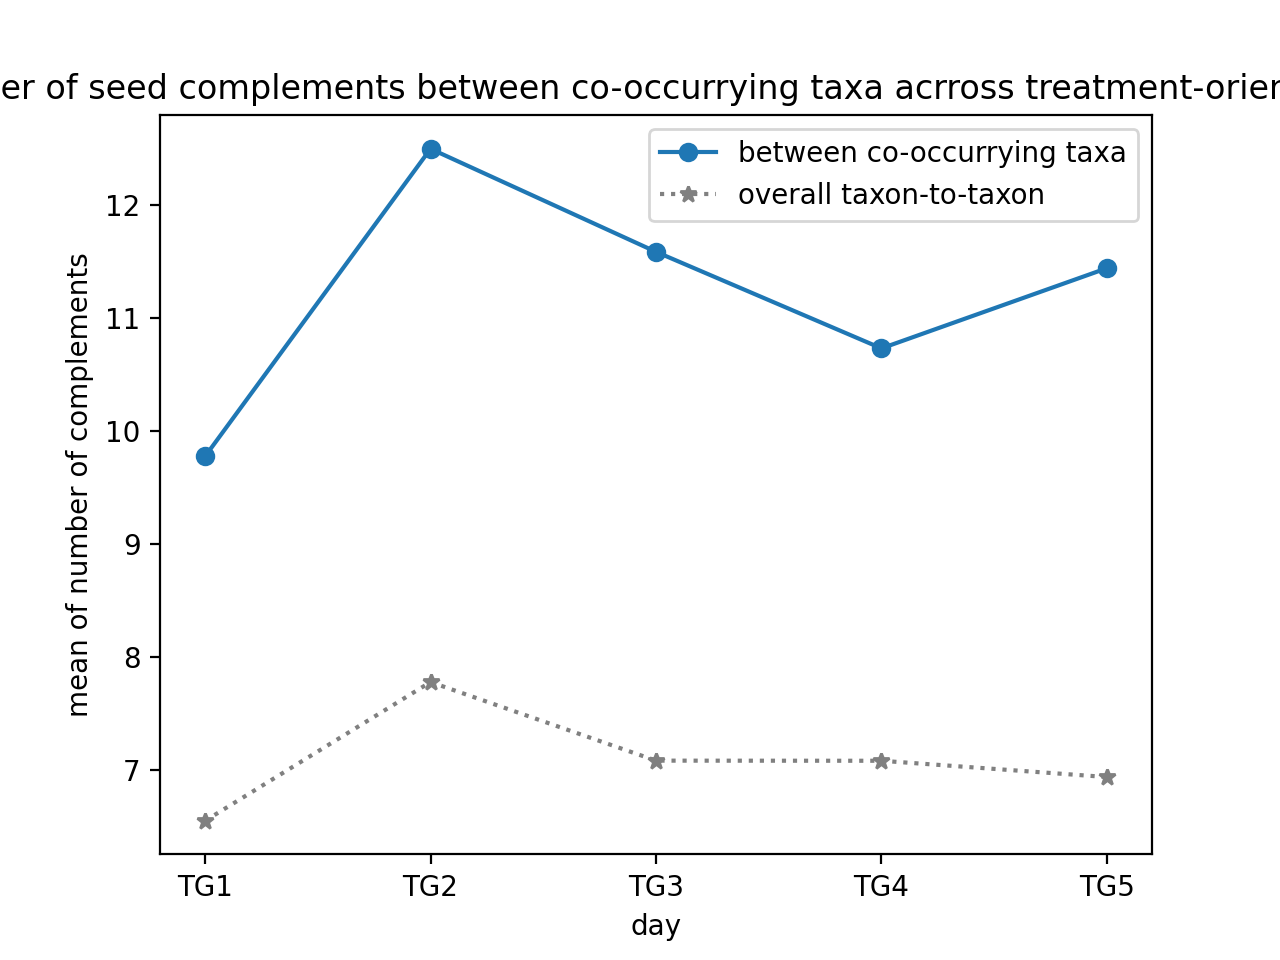

In [82]:
plt.plot(treatments, mean_of_seed_compl_in_positive_associated_taxa, marker='o', linestyle='-', label="between co-occurrying taxa")
plt.plot(treatments, mean_overall_number_of_seed_compl, marker="*", linestyle="dotted", color="grey", label="overall taxon-to-taxon")

# Labels and title
plt.xlabel("day")
plt.ylabel("mean of number of complements")
plt.title("Mean number of seed complements between co-occurrying taxa acrross treatment-oriented networks")

plt.legend()

# Show the plot
plt.show()

#### Unique compounds involved in potential cross-feedings of co-occurrying taxa

In [83]:
unique_compounds_in_cf_of_positive_associated_taxa = [
    get_compls_and_compounds_in_positive_associated_taxa(
        net.cx2, 
        net.pos_pairs_node_ids, 
        net.num_total_compls, 
        net.edge_id_to_unique_compounds
        )[1]
    for _, net in treatment_parsed_nets.items()
]

lengths = [
    len(x) for x in unique_compounds_in_cf_of_positive_associated_taxa
]

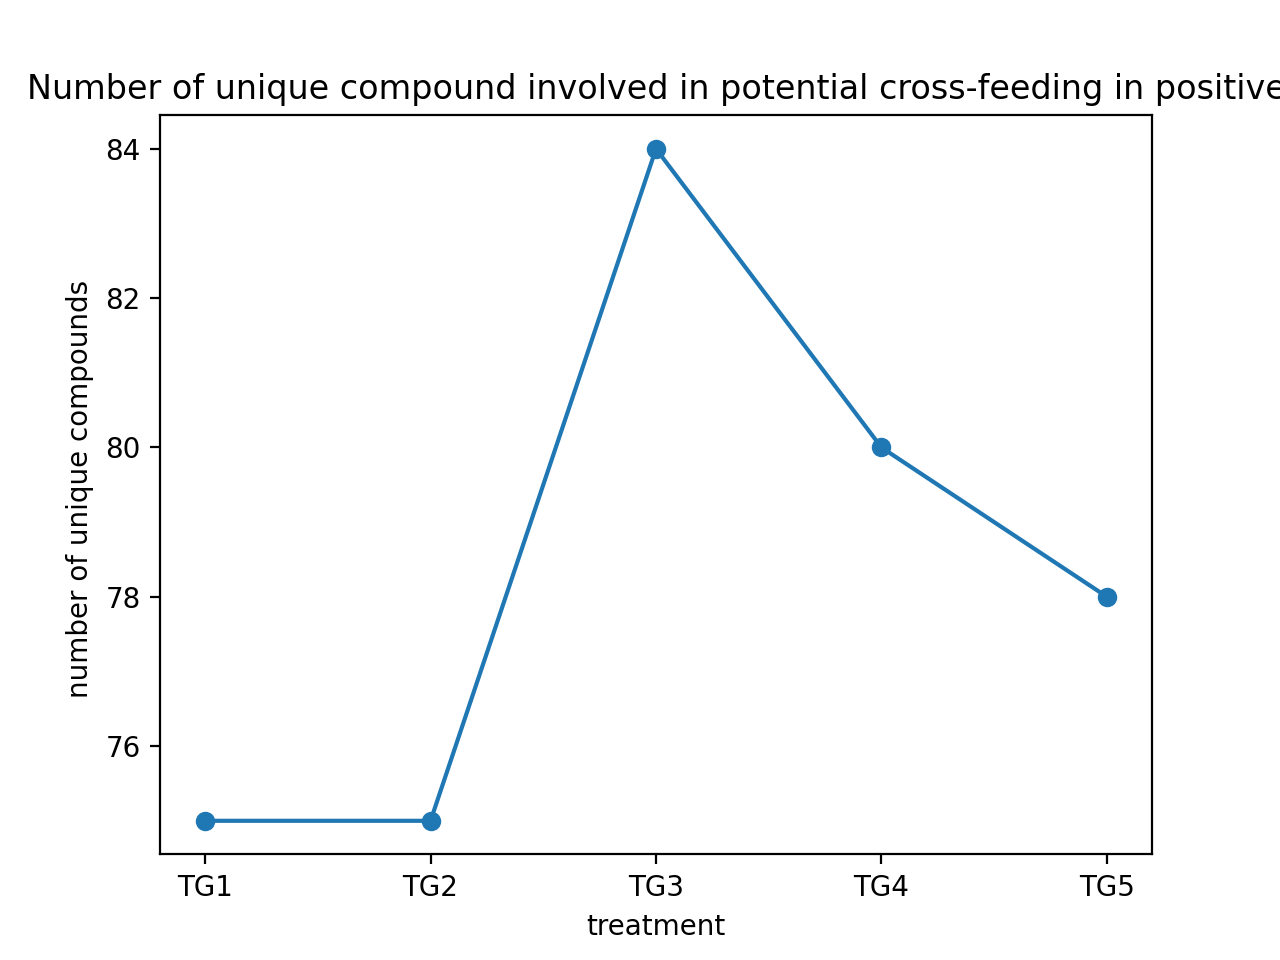

In [84]:
plt.plot(treatments, lengths, marker='o', linestyle='-')

# Labels and title
plt.xlabel("treatment")
plt.ylabel("number of unique compounds ")
plt.title("Number of unique compound involved in potential cross-feeding in positive")

# Show the plot
plt.show()

In [85]:
treatment_set = { i: j for i,j in zip(treatments, unique_compounds_in_cf_of_positive_associated_taxa)}

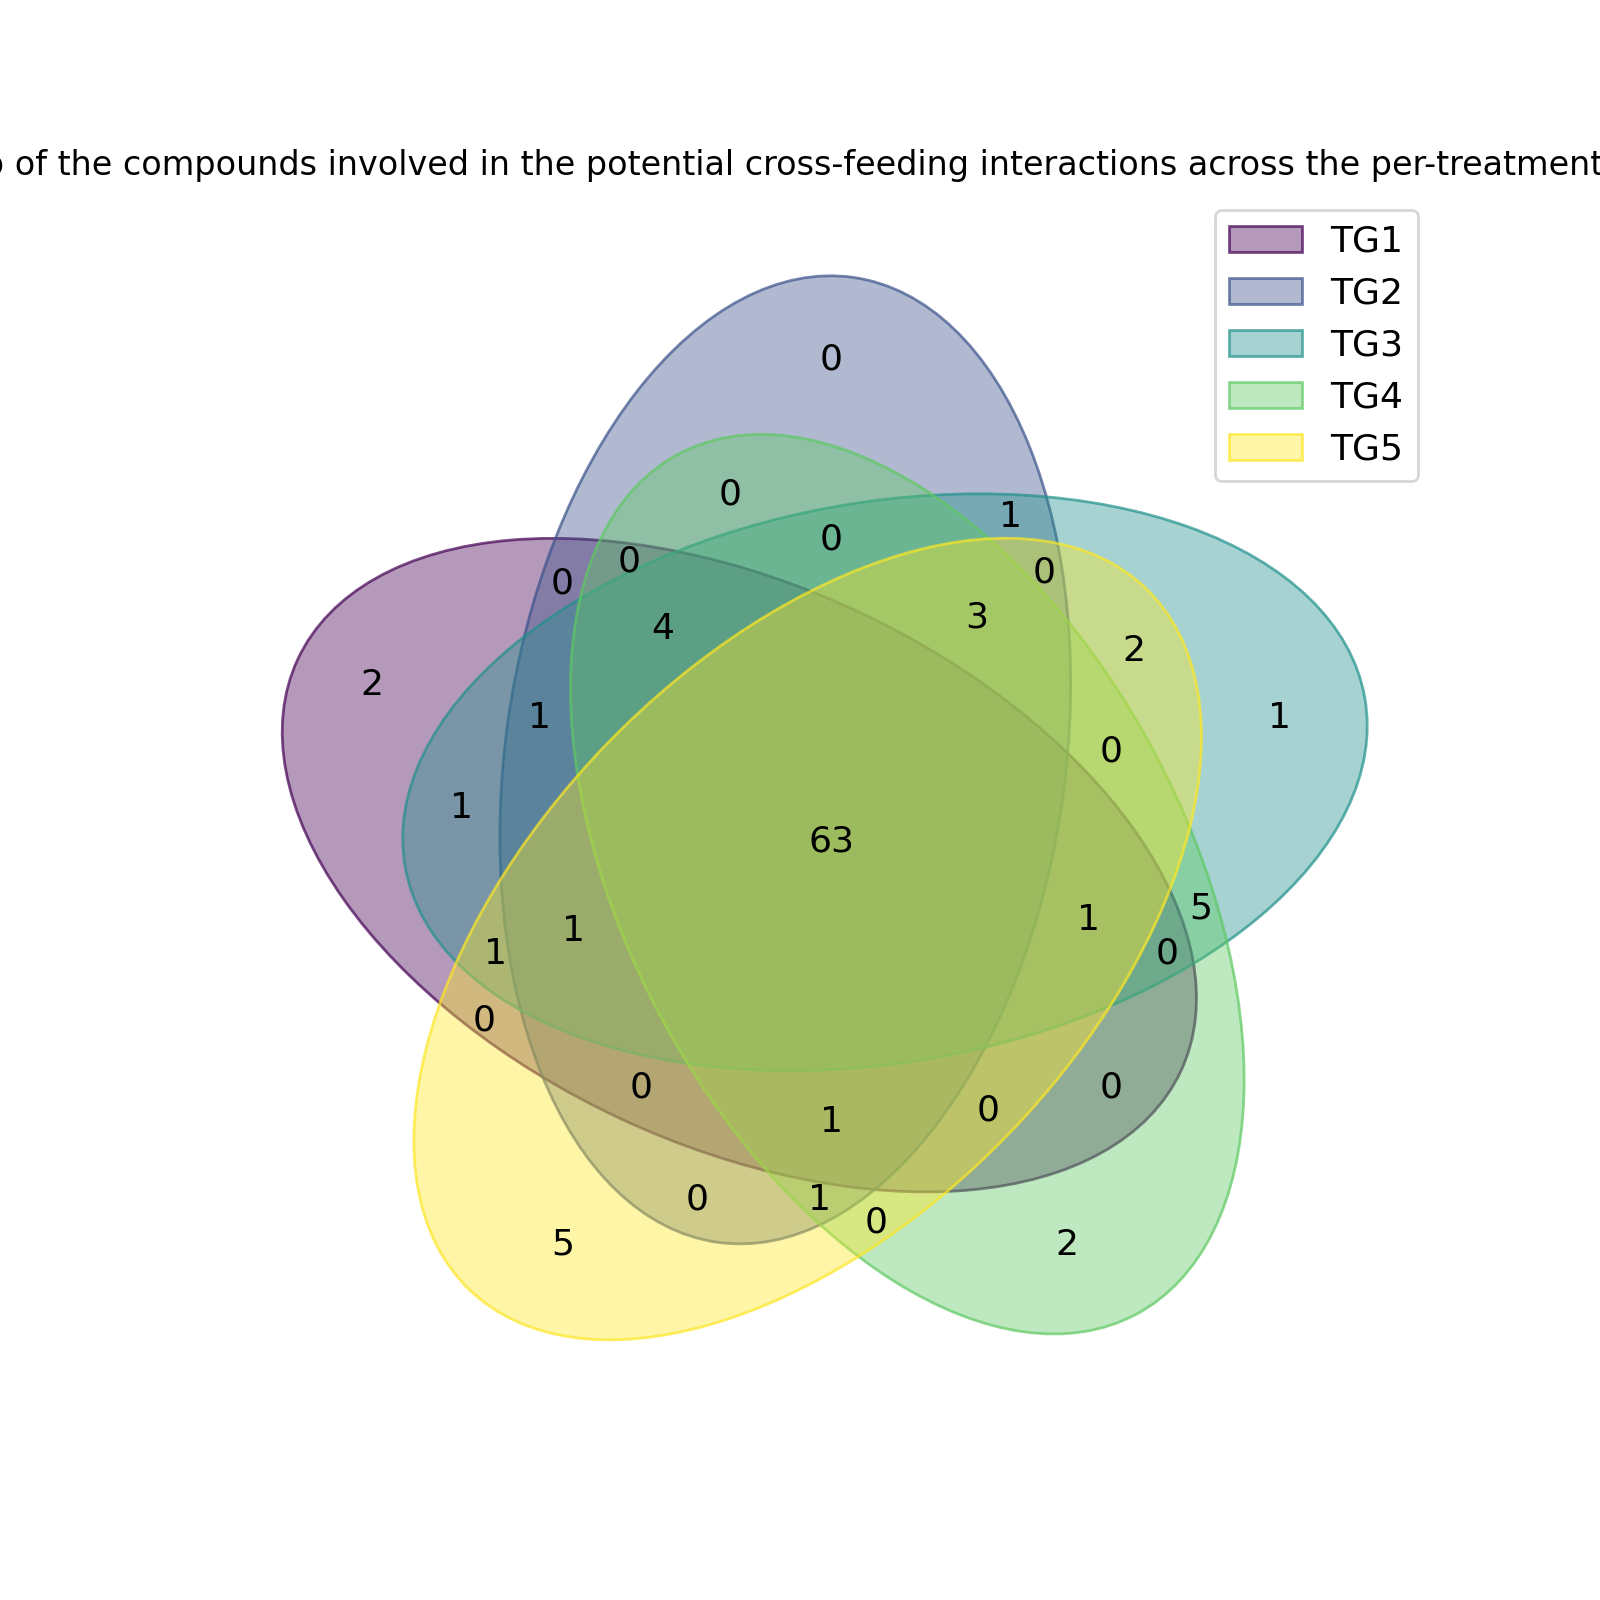

In [86]:
venn(treatment_set)
plt.title("Overlap of the compounds involved in the potential cross-feeding interactions across the per-treatment networks")

# Show the plot
plt.show()